## Getting started with a scalar equation

### Introduction

This case considers the resolution of the linear transport equation in 3 spatial dimensions (3D).
$$\frac{\partial u}{\partial t} + v_x\frac{\partial u}{\partial x}+ v_y\frac{\partial u}{\partial y}+ v_z\frac{\partial u}{\partial z}= 0 $$
where $v_x$, $v_y$ and $v_z$  are constant advection velocities in the x, y and z directions.

We consider the spatial domain $[0,1]\times[0,1]\times[0,1]$ and the simulation time $t=1$. We set cyclic boundaries. The initial condition is given by

$$u(x,y,z,0) = \left|\sin\left(x  \pi\right)  \sin\left(y  \pi\right)  \sin\left(z  \pi\right)\right|$$

and the exact solution is 

$$u(x,y,z,0) = \left|\sin\left((x-v_xt)  \pi\right)  \sin\left((y-v_yt)  \pi\right)  \sin\left((z-v_zt)  \pi\right)  \right|$$

### Importing required libraries

Some of these are well known libraries such as *numpy* and *matplotlib* (they can be installed using pip). We also need to import the library *utils* containing predefined functionalities for this software. Additionally, we use the *pyvista* library to do 3D rendering.

In [1]:
import os
import math                    
import numpy as np             
import matplotlib.pyplot as plt 
from matplotlib import animation
from IPython.display import HTML
import re
from glob import glob
from utils import modify_header_file,write_config,write_initial,write_initial_scalar,write_equilibrium,backup_file,restore_file,compile_program,compile_program_jupyter,run_program,initialize_variables,read_data_euler,read_data_scalar
import imageio
import pyvista as pv

Here is an overview of the libraries imported above:

**Standard Libraries**

- **`import os`**
  - Provides functions for interacting with the operating system, such as file manipulation and directory operations.

- **`import math`**
  - Provides mathematical functions and constants, such as trigonometric functions, logarithms, and constants like `pi`.

- **`import re`**
  - Supports regular expressions for pattern matching and text processing.

- **`from glob import glob`**
  - Used to find all the pathnames matching a specified pattern, useful for file searching.

**Numerical and Plotting Libraries**

- **`import numpy as np`**
  - Provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **`import matplotlib.pyplot as plt`**
  - A plotting library for creating static, animated, and interactive visualizations in Python.
 
- **`from matplotlib import animation`**
  - This is to create animations.
 
- **`IPython.display import HTML`**
  - This is to render animations in HTML.

**Image and 3D Visualization Libraries**

- **`import imageio`**
  - Used to read and write image data, including GIFs, which is useful for creating animated images.

- **`import pyvista as pv`**
  - Provides a set of tools for 3D plotting and mesh analysis, built on top of VTK. It simplifies tasks such as 3D data visualization and manipulation.

**Custom Utilities**

- **`from utils import ...`**
  - Imports custom utility functions from the `utils` module, which includes various functions for:
    - Modifying header files (`modify_header_file`)
    - Writing and reading configuration files (`write_config`, `write_initial`, `write_initial_scalar`)
    - Handling file backups and restorations (`backup_file`, `restore_file`)
    - Compiling and running programs (`compile_program`, `compile_program_jupyter`, `run_program`)
    - Initializing variables and reading simulation data (`initialize_variables`, `read_data_euler`, `read_data_scalar`)

### Setting up the paths

First, the name of the folder for this test case must be specified:

In [2]:
#This test case will run in the folder "caseScalar/". 
#Don't forget the bar (/). 
folder_case="caseScalar/" 

Then, all the paths are automatically assigned, directories created and previous files removed:

In [3]:
#Do not modify the folders and paths below
script_dir = os.getcwd()
folder_out="out/"
folder_lib="lib"
fname_config="configure.input"
fname_eq="equilibrium.out"
fname_ini="initial.out"
folder_out = os.path.join(script_dir, "../run/"+folder_case+"/"+folder_out)
folder_case = os.path.join(script_dir, "../run/"+folder_case)
folder_lib = os.path.join(script_dir, "../"+folder_lib)
folder_exe = os.path.join(script_dir, "../")
os.makedirs(folder_case, exist_ok=True)
os.makedirs(folder_out, exist_ok=True)
for f in glob(folder_out + "/*.out") + glob(folder_out + "/*.vtk") + glob(folder_out + "/*.png"):
    os.remove(f) 

### Compilation 

Here, we can modify those variables that need to be set before compilation and are found in the file *definitions.h*. Don't worry if you mess up things here, a backup of the original file is created before modification and will be restored at the end of this script, after compilation.

In [4]:
#Do not change the line below, it creates a backup of the definitions.h file
backup_file(folder_lib+'/definitions.h')
#Configure the header file for compilation. Add as many lines as desired for the macros you want to modify.
modify_header_file(folder_lib+'/definitions.h', 'NTHREADS', 24)         #number of threads
modify_header_file(folder_lib+'/definitions.h', 'TYPE_REC', 0)          #Reconstruction method: 0: WENO, 1: TENO, 2: OPT
modify_header_file(folder_lib+'/definitions.h', 'EQUATION_SYSTEM', 0)  #System of equations solved: 0: linear, 1: Burgers, 2: Euler
modify_header_file(folder_lib+'/definitions.h', 'READ_INITIAL', 1)     #Read initial data, this should ALWAYS be 1  
modify_header_file(folder_lib+'/definitions.h', 'WRITE_LIST', 1)     #Write *.out ASCII output files
modify_header_file(folder_lib+'/definitions.h', 'WRITE_VTK', 1)     #Write *.vtk output files
#Program is compiled with config above
compile_program_jupyter()
restore_file(folder_lib+'/definitions.h')

Backup created at /home/pc/Escritorio/pr/github/CAELUM/python/../lib/definitions.h.bak
NTHREADS changed to 24 in /home/pc/Escritorio/pr/github/CAELUM/python/../lib/definitions.h
TYPE_REC changed to 0 in /home/pc/Escritorio/pr/github/CAELUM/python/../lib/definitions.h
EQUATION_SYSTEM changed to 0 in /home/pc/Escritorio/pr/github/CAELUM/python/../lib/definitions.h
READ_INITIAL changed to 1 in /home/pc/Escritorio/pr/github/CAELUM/python/../lib/definitions.h
WRITE_LIST changed to 1 in /home/pc/Escritorio/pr/github/CAELUM/python/../lib/definitions.h
WRITE_VTK changed to 1 in /home/pc/Escritorio/pr/github/CAELUM/python/../lib/definitions.h
Running clean command...
rm -f lib/preproc.o lib/ibmutils.o lib/mathutils.o lib/closures.o lib/reconst.o lib/numcore.o lib/solvers.o lib/postproc.o main.o caelum

Running compile command...
gcc -Wall -fopenmp -O3 -c -o lib/preproc.o lib/preproc.c
gcc -Wall -fopenmp -O3 -c -o lib/ibmutils.o lib/ibmutils.c
gcc -Wall -fopenmp -O3 -c -o lib/mathutils.o lib/mat

### Configure the global simulation parameters

We can set the global simulation parameters as desired.

**Important note**: The order of accuracy can only be an odd number, i.e. 1, 3, 5 or 7.

In [5]:
# Simulation setup
FinalTime = 1.00  # The total time for the simulation run.
DumpTime = 0.1    # The interval at which data is saved during the simulation.
CFL = 0.2         # The Courant-Friedrichs-Lewy (CFL) number, a stability criterion for the simulation.
Order = 7         # The order of accuracy for the numerical scheme used in the simulation.

# Mesh setup
xcells = 20       # Number of cells in the x-direction.
ycells = 20       # Number of cells in the y-direction.
zcells = 20       # Number of cells in the z-direction.
SizeX = 1.0       # Physical size of the domain in the x-direction.
SizeY = 1.0       # Physical size of the domain in the y-direction.
SizeZ = 1.0       # Physical size of the domain in the z-direction.

# Boundary conditions: Setting to 1 to impose cyclic (periodic) boundaries
Face_1 = 1  # Boundary condition on the -y face (cyclic)
Face_2 = 1  # Boundary condition on the +x face (cyclic)
Face_3 = 1  # Boundary condition on the +y face (cyclic)
Face_4 = 1  # Boundary condition on the -x face (cyclic)
Face_5 = 1  # Boundary condition on the -z face (cyclic)
Face_6 = 1  # Boundary condition on the +z face (cyclic)

# Linear transport parameters (if applicable)
u_x = 1.0  # Velocity component in the x-direction (positive flow along +x axis)
u_y = 0.0  # Velocity component in the y-direction (no flow in the y-direction)
u_z = 0.0  # Velocity component in the z-direction (no flow in the z-direction)

### Define the initial condition

To define the initial condition we first need to create the arrays and initialize some variables:

In [6]:
xc, yc, zc, u, uex, *_  = initialize_variables(xcells, ycells, zcells, SizeX, SizeY, SizeZ)

Then we can set the initial condition using those variables. To do this, we loop over the three cartesian indexes $(l,m,n)$ and assign the variables, e.g. $u(x_l,y_m,z_n)=...$ is set as ```u[l,m,n]=...```. Cell centers are given by: ```xc[l,m,n]```, ```yc[l,m,n]``` and ```zc[l,m,n]```. ```uex``` will be the array containing the exact solution.

**Important note**: For simplicity, in the cell bellow we impose the initial condition as pointwise data without performing cell averaging. However, the correct form of doing it when working with FV schemes is to impose cell averages. In the function *ordersLinear()* in the library *utils.py* it is done in this way, to adequately compute the experimental convergence rates. 

In [7]:
#Initial condition and exact solution at final time   
for l in range(0,xcells): 
        for m in range(0,ycells): 
            for n in range(0,zcells):
                u[l,m,n]  =np.sin(xc[l,m,n]*math.pi)*np.sin(yc[l,m,n]*math.pi)*np.sin(zc[l,m,n]*math.pi) 
                uex[l,m,n]=np.abs(np.sin((xc[l,m,n]-u_x*FinalTime)*math.pi)*np.sin((yc[l,m,n]-u_y*FinalTime)*math.pi)*np.sin((zc[l,m,n]-u_z*FinalTime)*math.pi)) 

Now, the configuration and initial condition files are written: 

In [8]:
write_config(folder_case, fname_config, FinalTime, DumpTime, CFL, Order, xcells, ycells, zcells, SizeX, SizeY, SizeZ, Face_1, Face_2, Face_3, Face_4, Face_5, Face_6, u_x, u_y, u_z)      
write_initial_scalar(folder_case, fname_ini, xcells, ycells, zcells, xc, yc, zc, u)

### Execution

The program is executed:

In [9]:
print("Program is running...")
run_program(folder_exe+"./caelum "+folder_case)

Program is running...
Program output:
The number of threads is set to 24.
Thread 13 of 24 is checked.
Thread 4 of 24 is checked.
Thread 19 of 24 is checked.
Thread 1 of 24 is checked.
Thread 16 of 24 is checked.
Thread 20 of 24 is checked.
Thread 15 of 24 is checked.
Thread 12 of 24 is checked.
Thread 3 of 24 is checked.
Thread 9 of 24 is checked.
Thread 7 of 24 is checked.
Thread 2 of 24 is checked.
Thread 14 of 24 is checked.
Thread 6 of 24 is checked.
Thread 17 of 24 is checked.
Thread 0 of 24 is checked.
Thread 10 of 24 is checked.
Thread 22 of 24 is checked.
Thread 8 of 24 is checked.
Thread 11 of 24 is checked.
Thread 21 of 24 is checked.
Thread 5 of 24 is checked.
Thread 23 of 24 is checked.
Thread 18 of 24 is checked.

 Authors:
  - Adrián Navas Montilla
  - Isabel Echeverribar 
 Copyright (C) 2019-2024 The authors.   

 
 SIMULATION SETUP:
 Folder path: /home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar/ 
 WENO reconstruction of order 7 is chosen. 
 Final time: 1.00

### Reading data and plotting

This can be customized for each particular case.  In this case, we use *pyvista* to read the VTK files and carry out some 3D plots. The plots are saved as PNG images and a GIF animation is also created.

First, OUT files are sought and listed:

In [10]:
files = sorted(glob(folder_out + "/*.out"), key=lambda x: int(re.findall(r'\d+', os.path.basename(x))[0]))
lf = len(files)
lf=len(files)
print(files)
print("Printing figures in folder"+folder_out)

['/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state000.out', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state001.out', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state002.out', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state003.out', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state004.out', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state005.out', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state006.out', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state007.out', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state008.out', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state009.out', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state010.out']
Printing figures in folder/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScala

#### 1D plot

Then, an animation of a 1D plot  along the $x$ direction and passing trhough $y=0.5$ and $z=0.5$ is created for all times:

/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state000.out file read
/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state001.out file read
/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state002.out file read
/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state003.out file read
/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state004.out file read
/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state005.out file read
/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state006.out file read
/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state007.out file read
/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state008.out file read
/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state009.out file read
/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state010.out file read


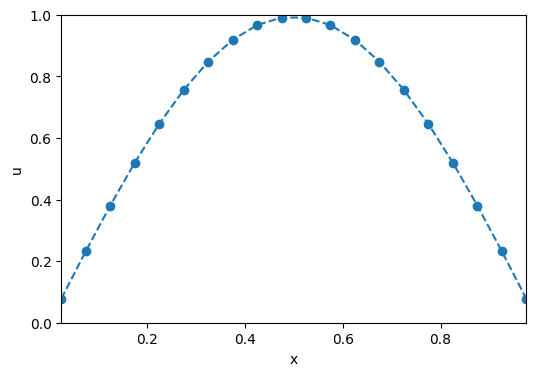

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel("x") 
ax.set_ylabel("u")
line, = ax.plot([], [], 'o--')  # line object to update

m = int(ycells / 2)
n = int(zcells / 2)

u = np.zeros((xcells, ycells, zcells, lf))  # lf = number of time frames
j = 0
for fname in files:
    u = read_data_scalar(u, fname, xcells, ycells, zcells, lf, j)
    j += 1

def update(frame):
    #ax.set_title(f"Tiempo: {frame * dt:.3f} s")
    line.set_data(xc[:, m, n], u[:, m, n, frame])
    ax.set_xlim(xc[0, m, n], xc[-1, m, n])
    ax.set_ylim(0, 1)
    #ax.set_ylim(np.min(u[:, m, n, :]), np.max(u[:, m, n, :]))
    return line,
    
ani = animation.FuncAnimation(fig, update, frames=lf, interval=100)

HTML(ani.to_jshtml())

#### 2D plots

Now, the solution at $t=0.5$ and $t=1$ is plotted using the projection of the solution on 3 intersecting planes passing through the origin:

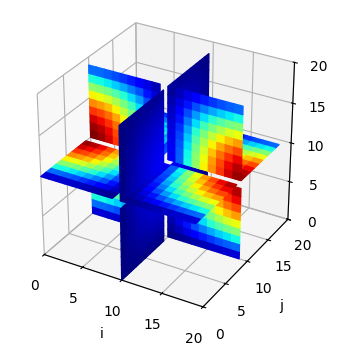

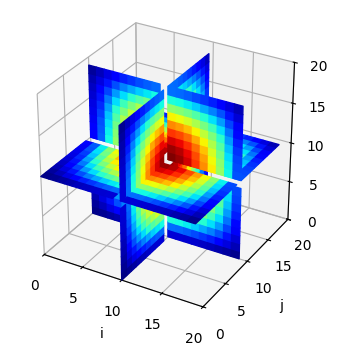

In [12]:
#from https://matplotlib.org/stable/gallery/mplot3d/intersecting_planes.html#sphx-glr-gallery-mplot3d-intersecting-planes-py
def plot_quadrants(ax, array, fixed_coord, cmap): 
    """For a given 3d *array* plot a plane with *fixed_coord*, using four quadrants."""
    nx, ny, nz = array.shape
    index = {
        'x': (nx // 2, slice(None), slice(None)),
        'y': (slice(None), ny // 2, slice(None)),
        'z': (slice(None), slice(None), nz // 2),
    }[fixed_coord]
    plane_data = array[index]

    n0, n1 = plane_data.shape
    quadrants = [
        plane_data[:n0 // 2, :n1 // 2],
        plane_data[:n0 // 2, n1 // 2:],
        plane_data[n0 // 2:, :n1 // 2],
        plane_data[n0 // 2:, n1 // 2:]
    ]

    min_val = array.min()
    max_val = array.max()

    cmap = plt.get_cmap(cmap)

    for i, quadrant in enumerate(quadrants):
        facecolors = cmap((quadrant - min_val) / (max_val - min_val))
        if fixed_coord == 'x':
            Y, Z = np.mgrid[0:ny // 2, 0:nz // 2]
            X = nx // 2 * np.ones_like(Y)
            Y_offset = (i // 2) * ny // 2
            Z_offset = (i % 2) * nz // 2
            ax.plot_surface(X, Y + Y_offset, Z + Z_offset, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False)
        elif fixed_coord == 'y':
            X, Z = np.mgrid[0:nx // 2, 0:nz // 2]
            Y = ny // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Z_offset = (i % 2) * nz // 2
            ax.plot_surface(X + X_offset, Y, Z + Z_offset, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False)
        elif fixed_coord == 'z':
            X, Y = np.mgrid[0:nx // 2, 0:ny // 2]
            Z = nz // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Y_offset = (i % 2) * ny // 2
            ax.plot_surface(X + X_offset, Y + Y_offset, Z, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False)


def figure_3D_array_slices(array, cmap=None):
    """Plot a 3d array using three intersecting centered planes."""
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect(array.shape)
    nx, ny, nz = array.shape
    plot_quadrants(ax, array, 'x', cmap=cmap)
    plot_quadrants(ax, array, 'y', cmap=cmap)
    plot_quadrants(ax, array, 'z', cmap=cmap)
    ax.set(xlim=(0, nx), ylim=(0, ny), zlim=(0, nz),xlabel='i', ylabel='j', zlabel='k')
    return fig, ax

dataU = u[:,:,:,int(lf/2)]
figure_3D_array_slices(dataU, cmap='jet')
plt.show()

dataU = u[:,:,:,-1]
figure_3D_array_slices(dataU, cmap='jet')
plt.show()


Now, a 2D plot in the $X-Z$ plane at the final time is created. We plot the numerical solution using ```contourf()``` and the exact solution using  ```contour()```:

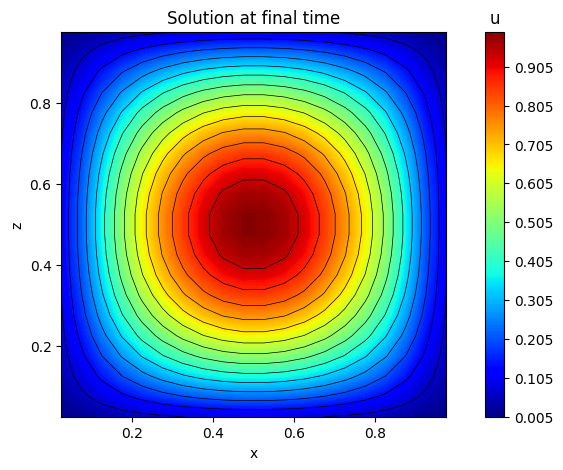

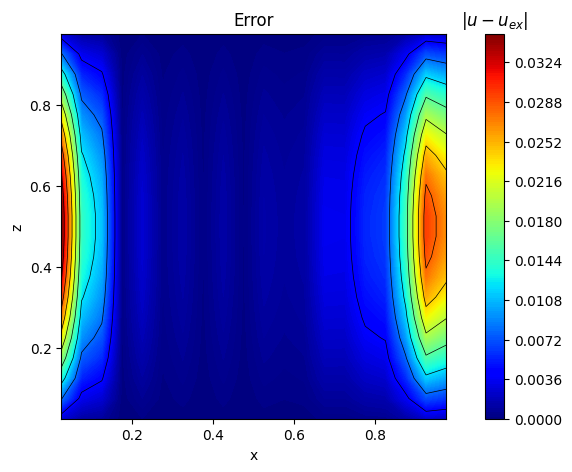

In [13]:
xp = xc[:,0,0]     
zp = zc[0,0,:]      
X, Y = np.meshgrid(xp, zp)   
U=np.transpose(u[:,m,:,-1])
UEX=np.transpose(uex[:,m,:])

fig, ax = plt.subplots(figsize=(10, 5))   
levels = np.linspace(0, 1, 16)
#print(levels)
plot1=ax.contour(X, Y, UEX, levels=levels,colors="k",linewidths=0.5) 
plot1=ax.contourf(X, Y, U, 200, cmap='jet')   
ax.set_title('Solution at final time')
ax.set_xlabel("x") 
ax.set_ylabel("z") 
ax.set_aspect('equal', 'box')
plot1.set_clim( 0, 1 )
# Create colorbar
cbar = plt.colorbar(plot1)
cbar.ax.set_title('u')

filename = folder_out+"linear_scalar_plot_2D"
image_path = filename + ".png"
fig.savefig(image_path,dpi=300)


fig, ax = plt.subplots(figsize=(10, 5))   
#print(levels)
plot1=ax.contour(X, Y, np.abs(U-UEX), 10,colors="k",linewidths=0.5) 
plot1=ax.contourf(X, Y, np.abs(U-UEX), 200, cmap='jet')   
ax.set_title('Error')
ax.set_xlabel("x") 
ax.set_ylabel("z") 
ax.set_aspect('equal', 'box')
# Create colorbar
cbar = plt.colorbar(plot1)
cbar.ax.set_title('$|u-u_{ex}|$')

filename = folder_out+"linear_scalar_plot_2D_error"
image_path = filename + ".png"
fig.savefig(image_path,dpi=300)

#### 3D plots (rendered)

The following cell performs off-screen rendering of 3D data stored in VTK files and creates an animated GIF. This is how it works:

1. **Initialize Virtual Framebuffer**:
   - `pv.start_xvfb()`: Starts Xvfb for off-screen rendering, useful for headless environments.

2. **Find and Sort VTK Files**:
   - `vtk_files = glob(folder_out + "/*.vtk")`: Finds all `.vtk` files in the specified folder.
   - `vtk_files_with_digits`: Filters these files to include only those with digits in their filenames, indicating sequential data (e.g., time steps).
   - `files = sorted(...)`: Sorts the filtered files based on the numerical value found in the filenames.

3. **Render and Save Images**:
   - Loops through each VTK file:
     - Reads the VTK data and converts cell data to point data.
     - Creates a `Plotter` object for off-screen rendering.
     - Generates contour plots for specified values.
     - Configures the camera position and adds a bounding box for reference.
     - Saves a screenshot of the rendered image and stores it in a list.

4. **Create GIF Animation**:
   - `imageio.mimsave(...)`: Combines the saved images into an animated GIF, specifying the duration and loop settings.



['/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state000.vtk', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state001.vtk', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state002.vtk', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state003.vtk', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state004.vtk', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state005.vtk', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state006.vtk', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state007.vtk', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state008.vtk', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state009.vtk', '/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScalar//out/state010.vtk']
Printing figures in folder/home/pc/Escritorio/pr/github/CAELUM/python/../run/caseScala

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


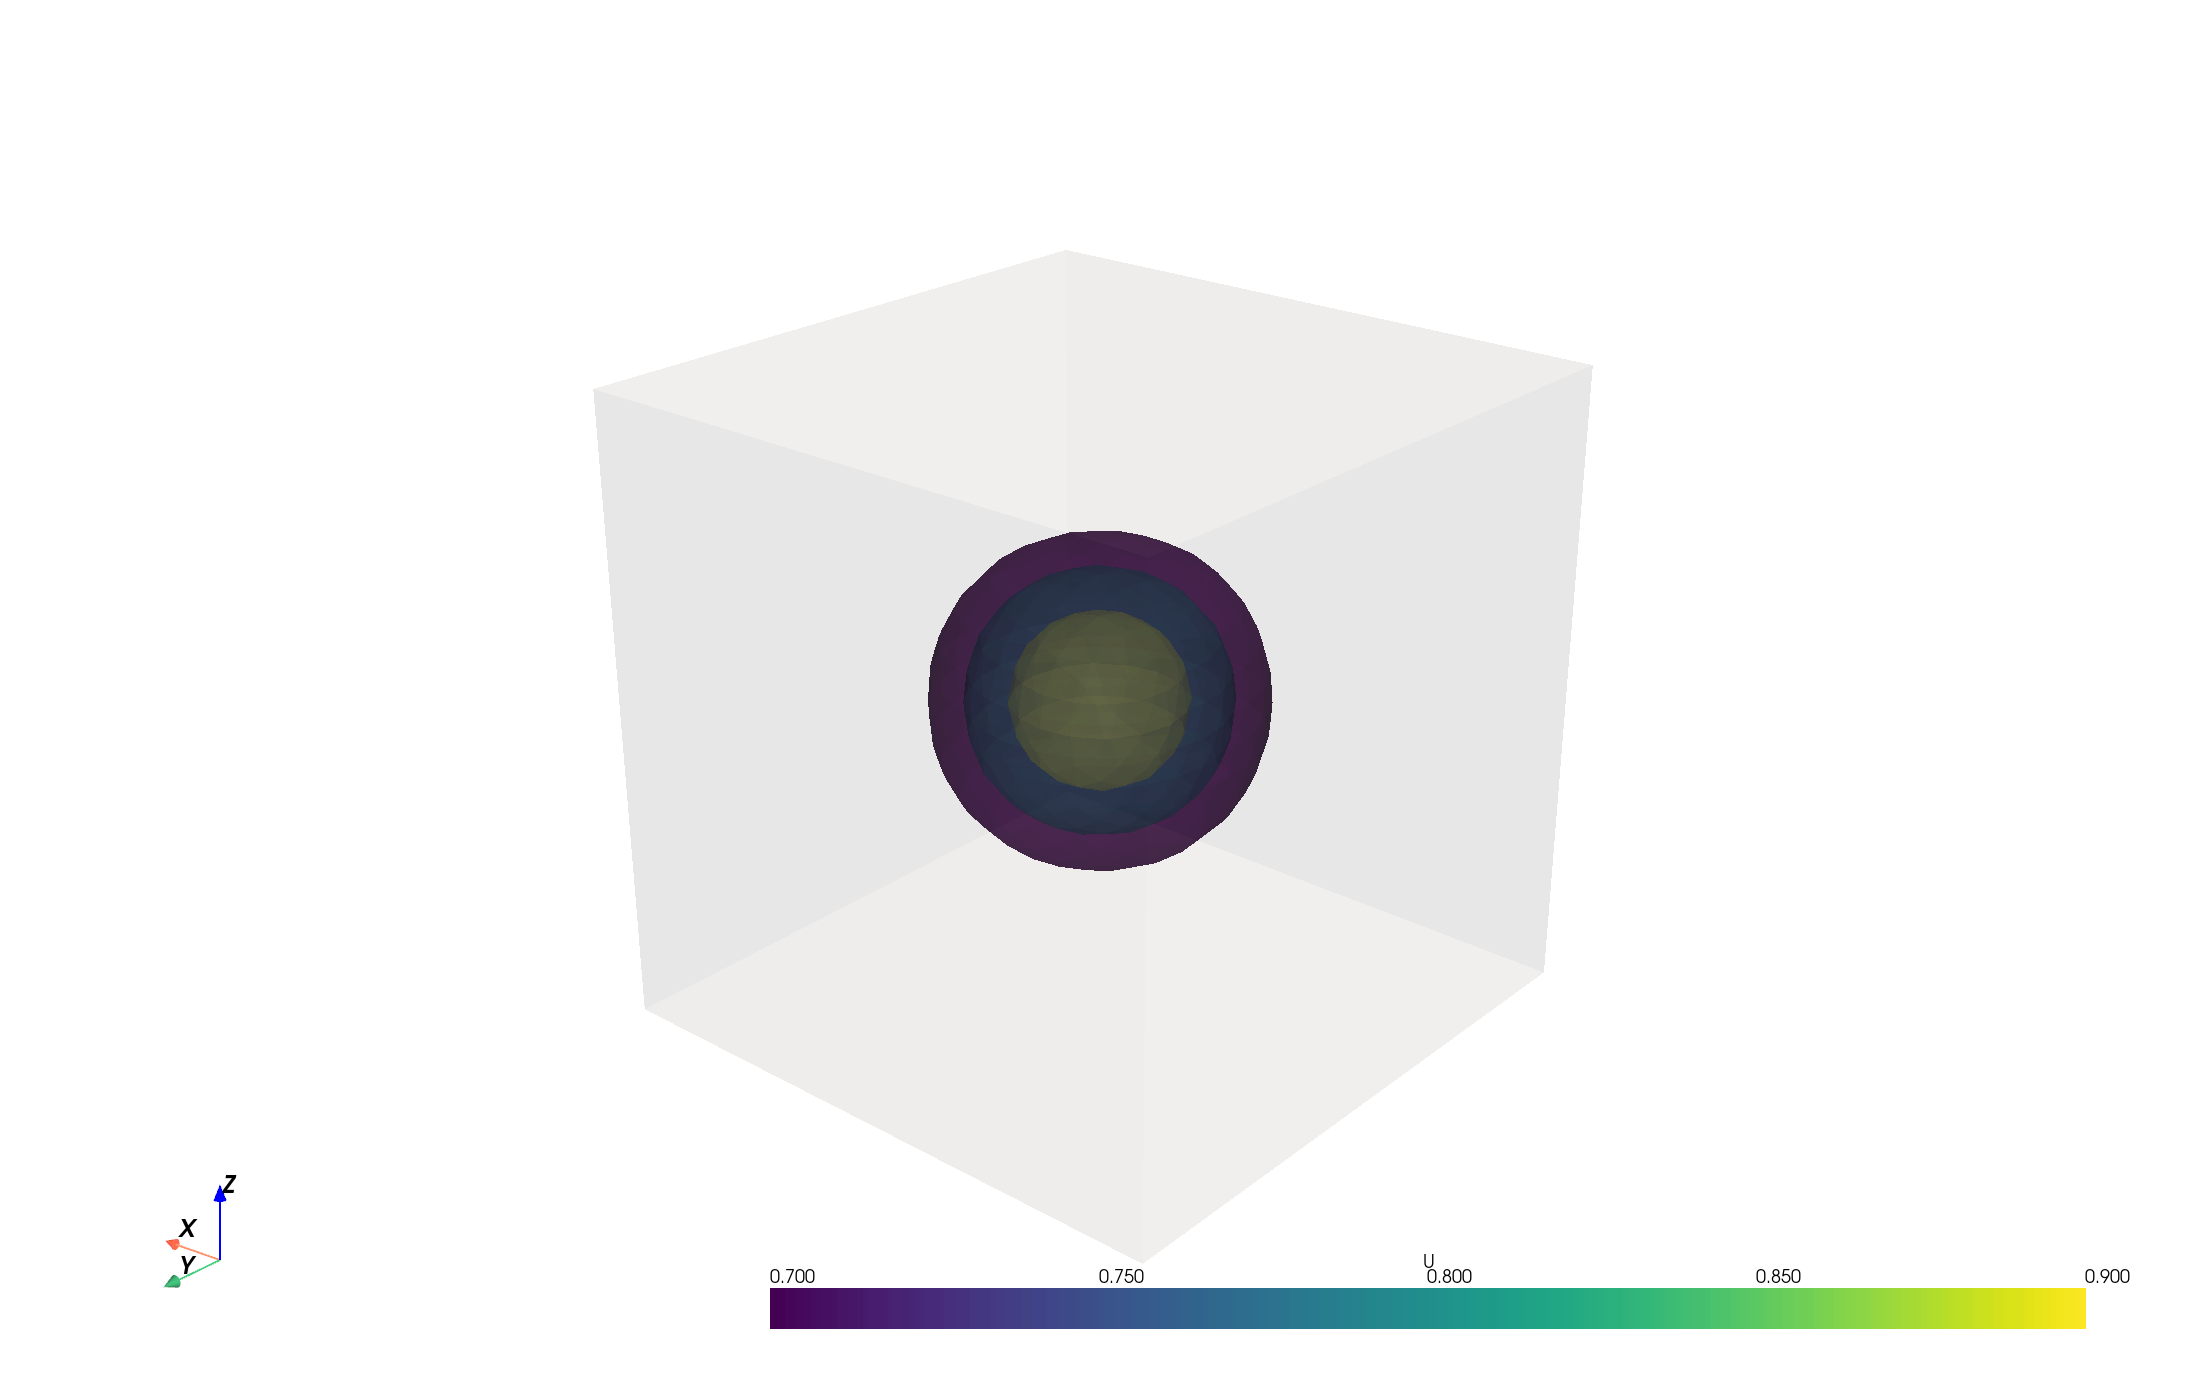

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


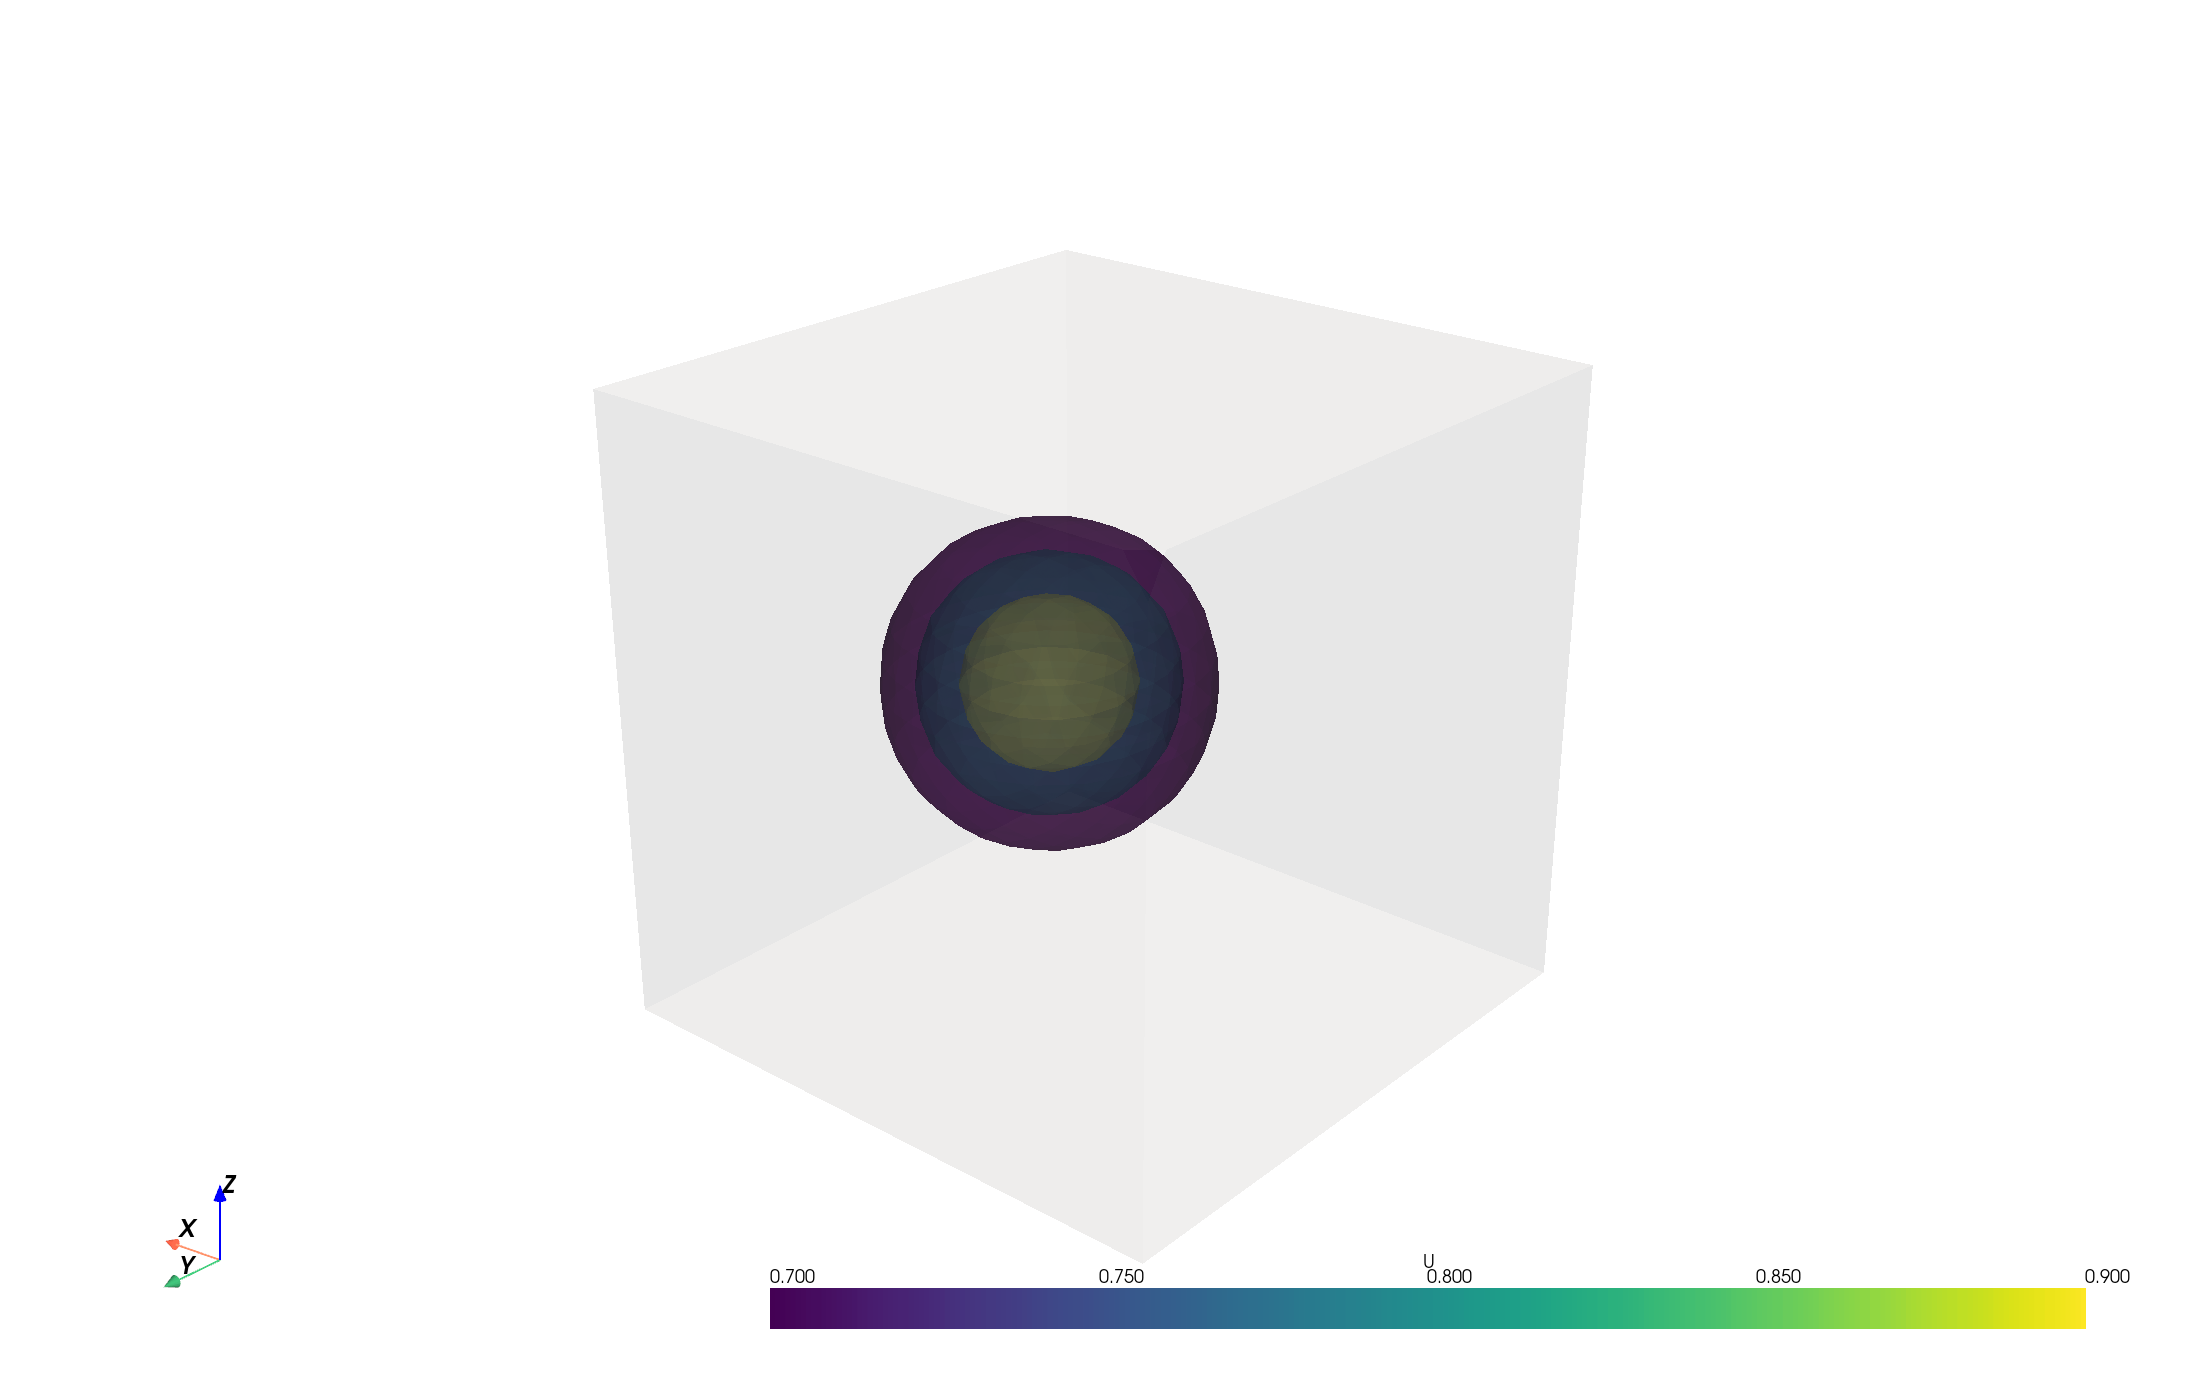

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


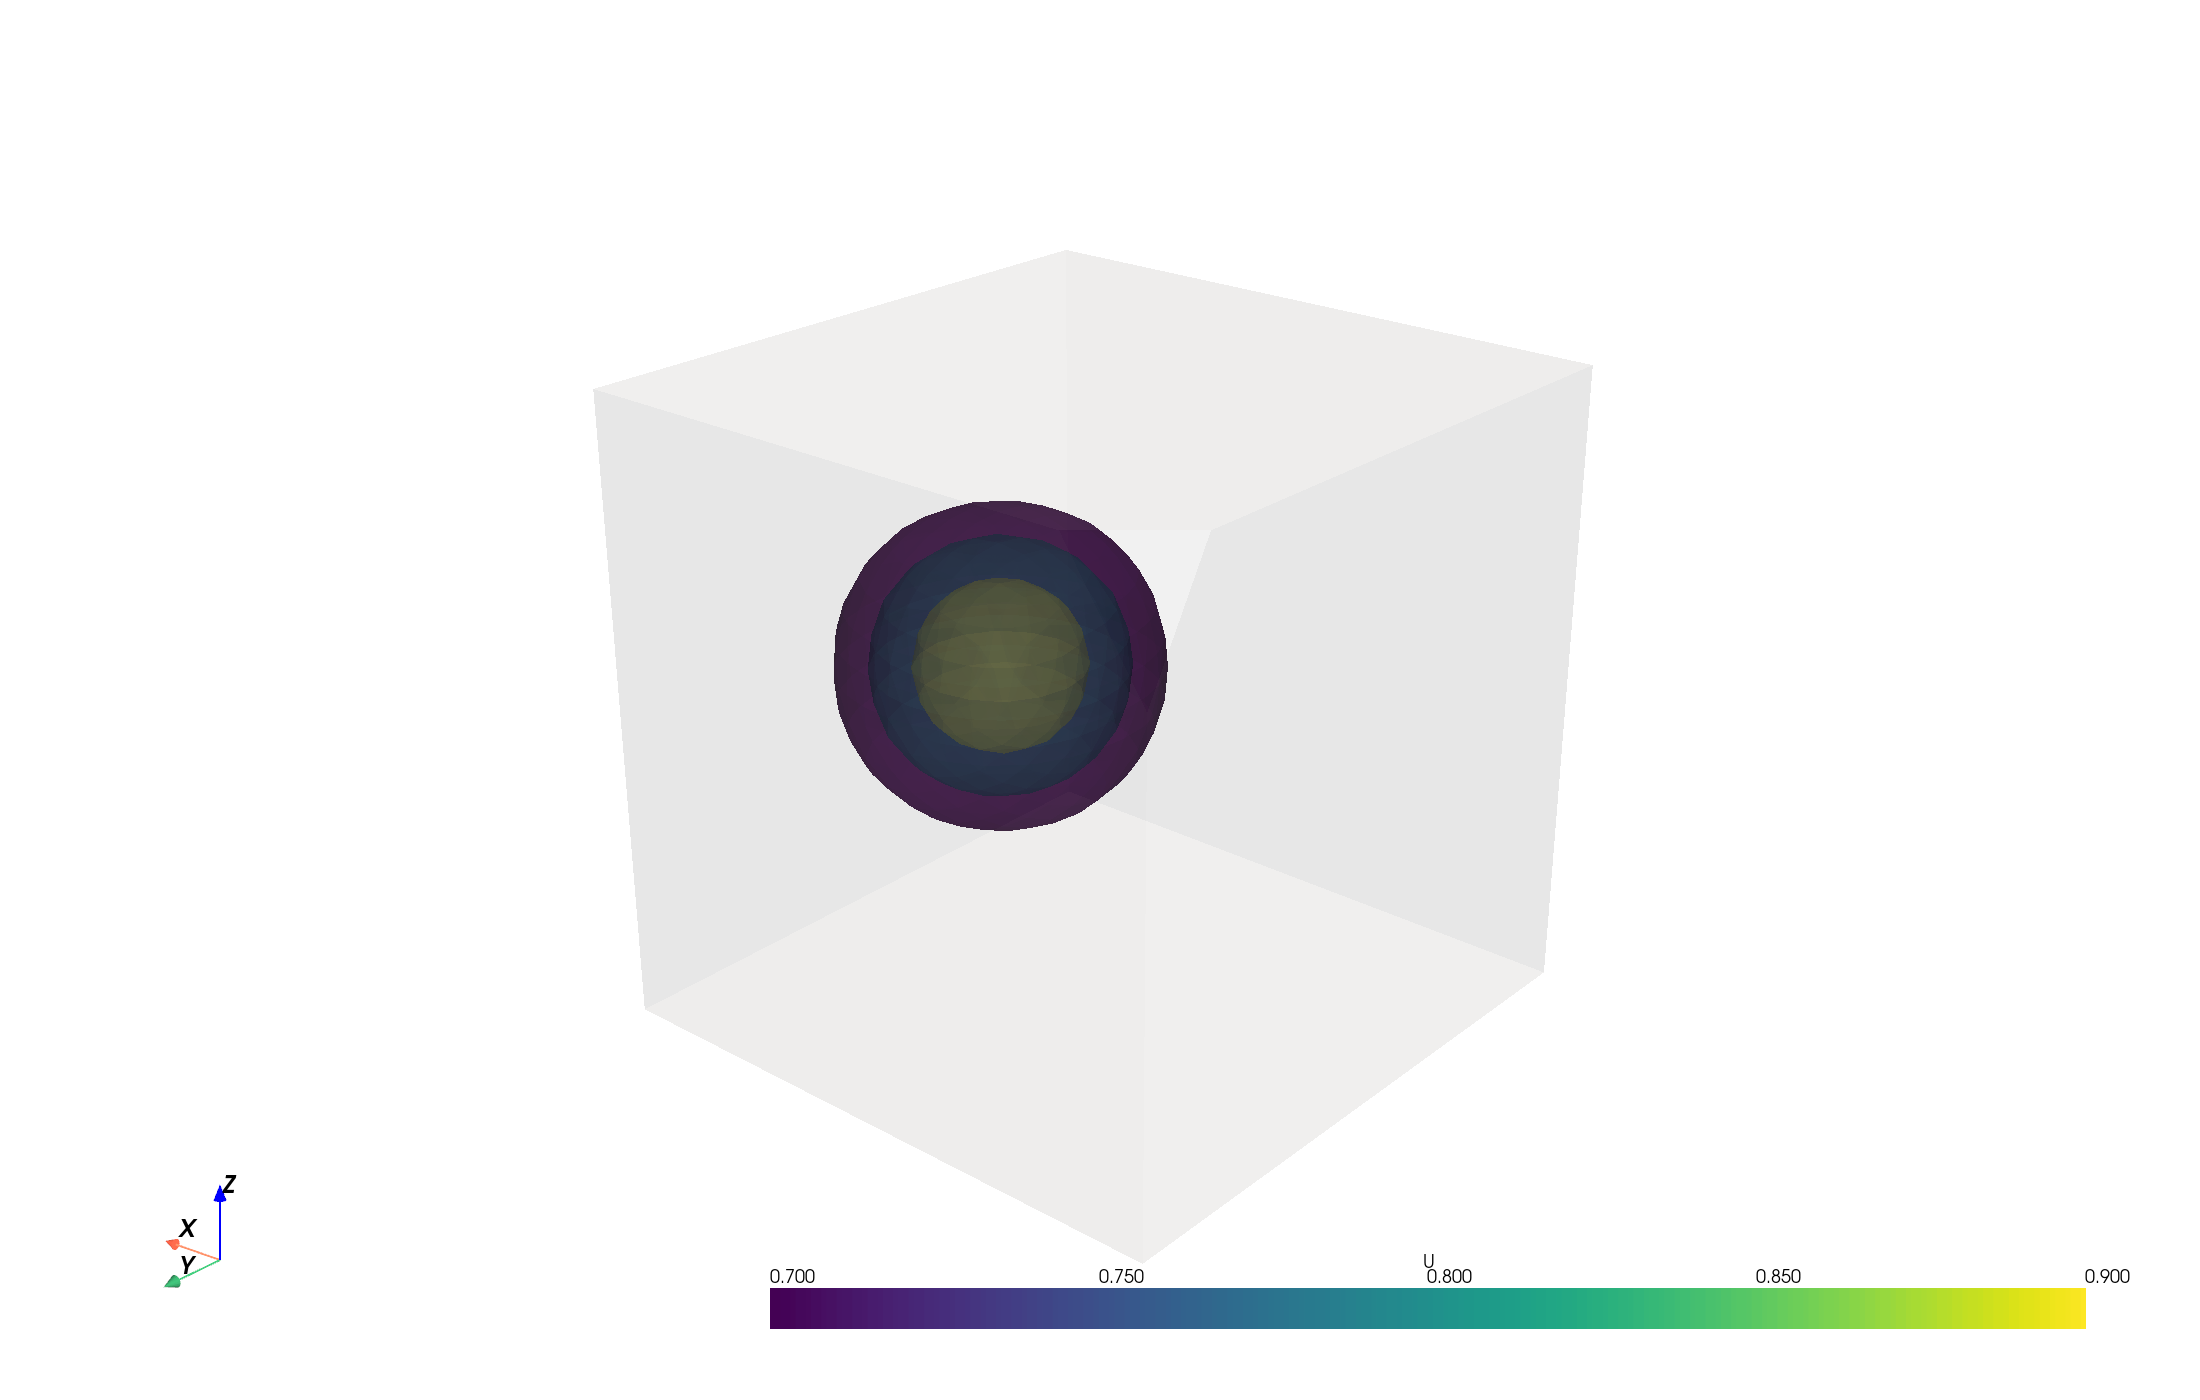

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


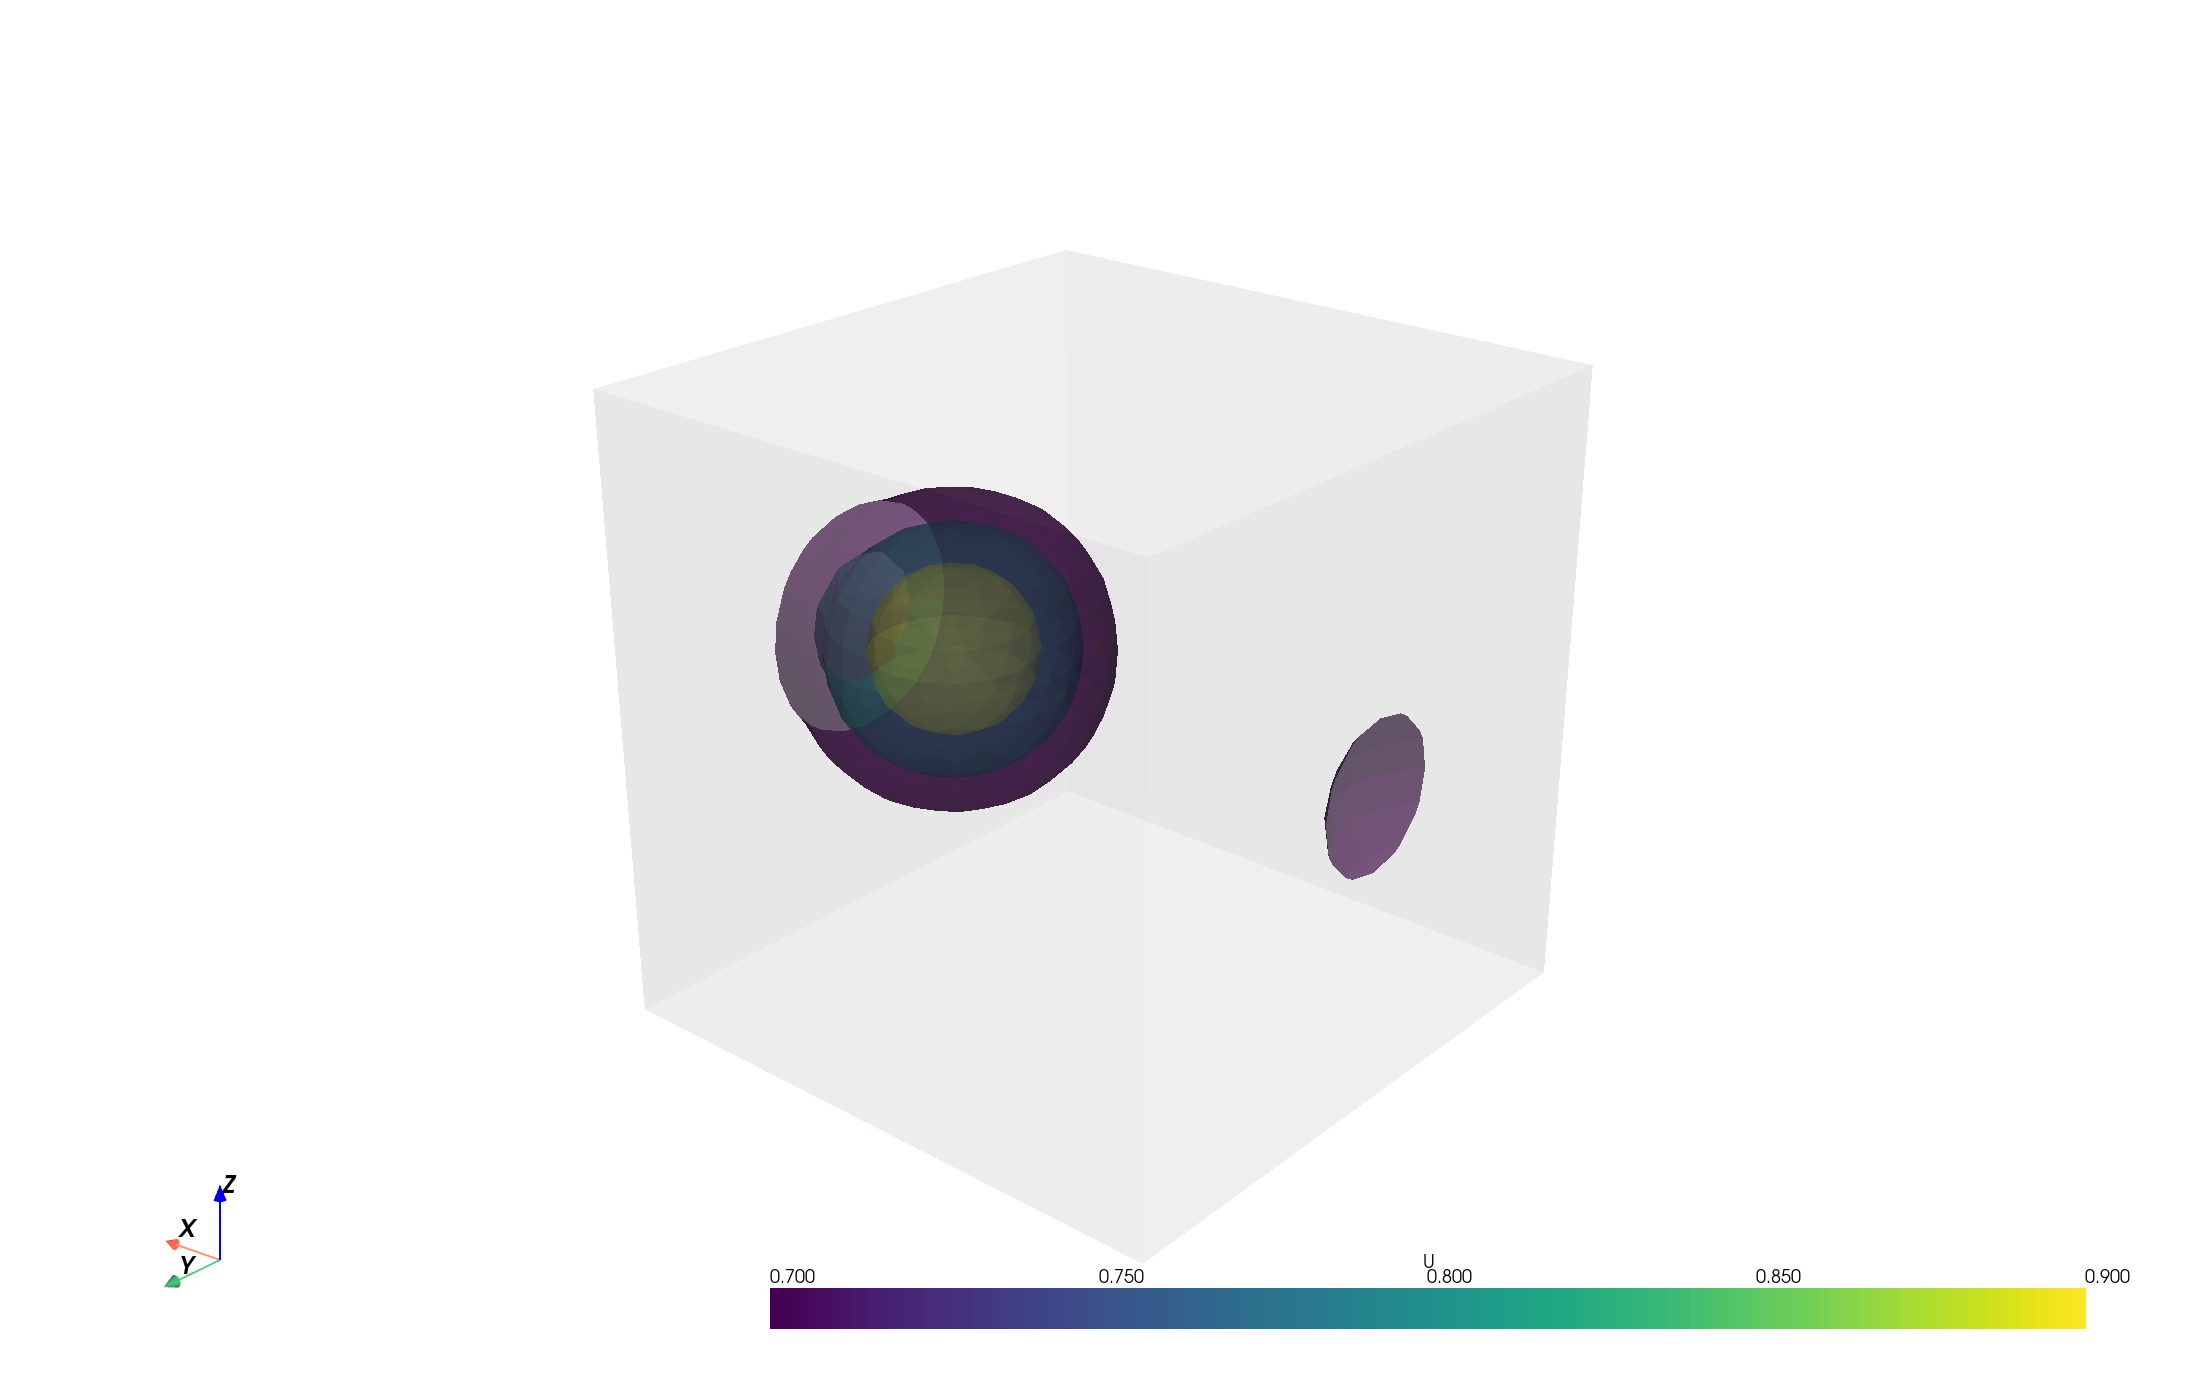

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


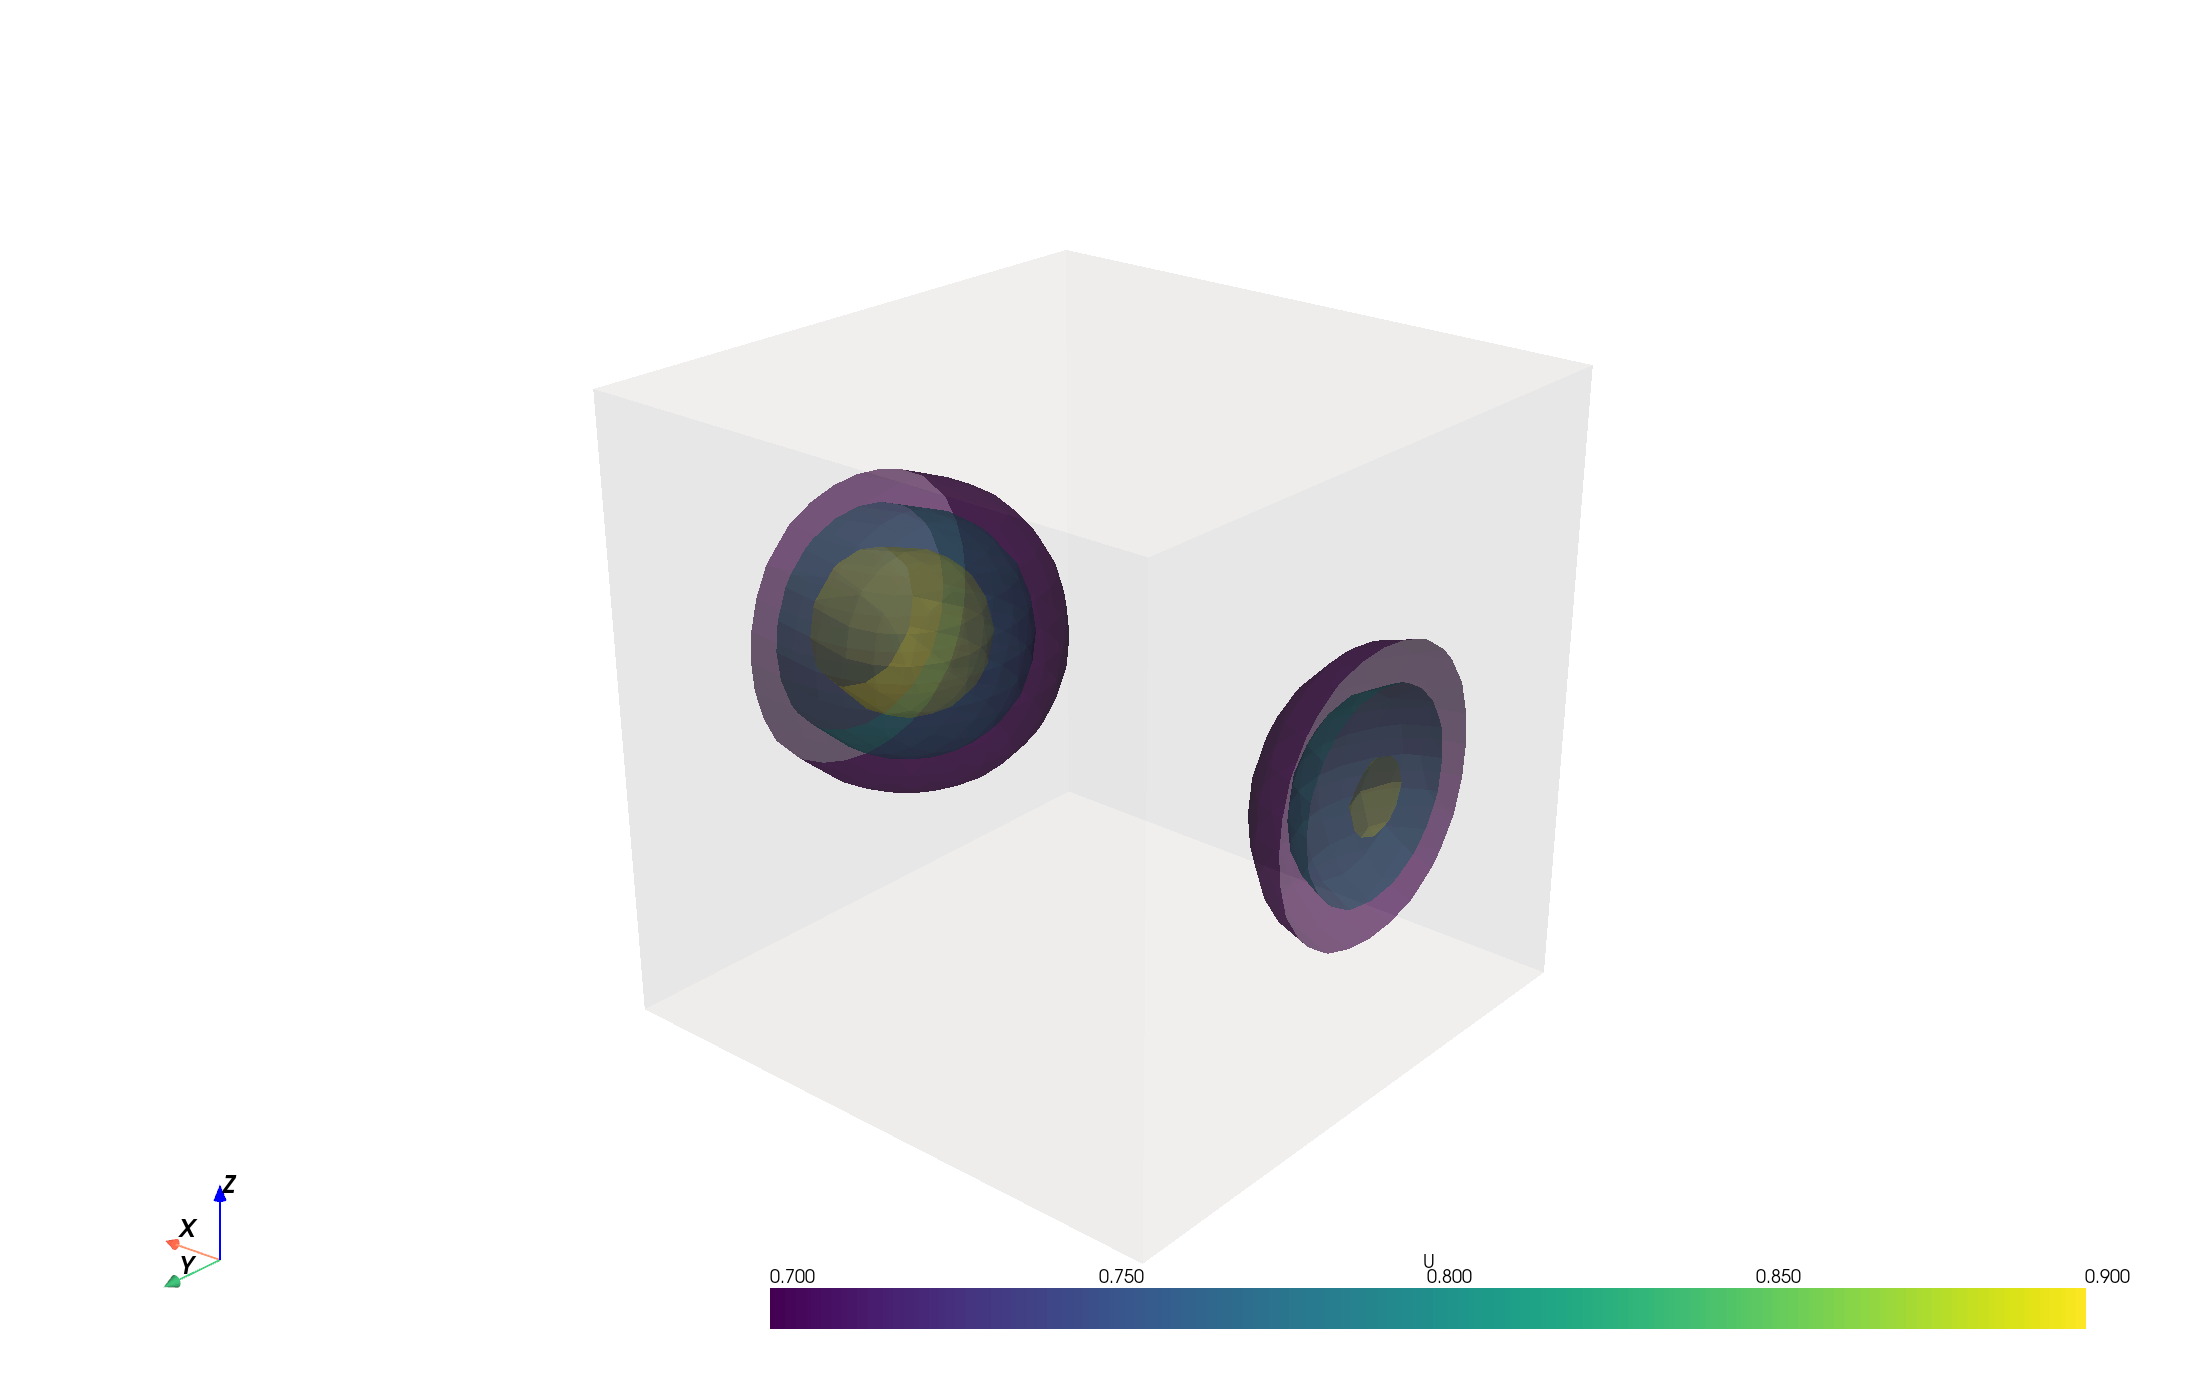

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


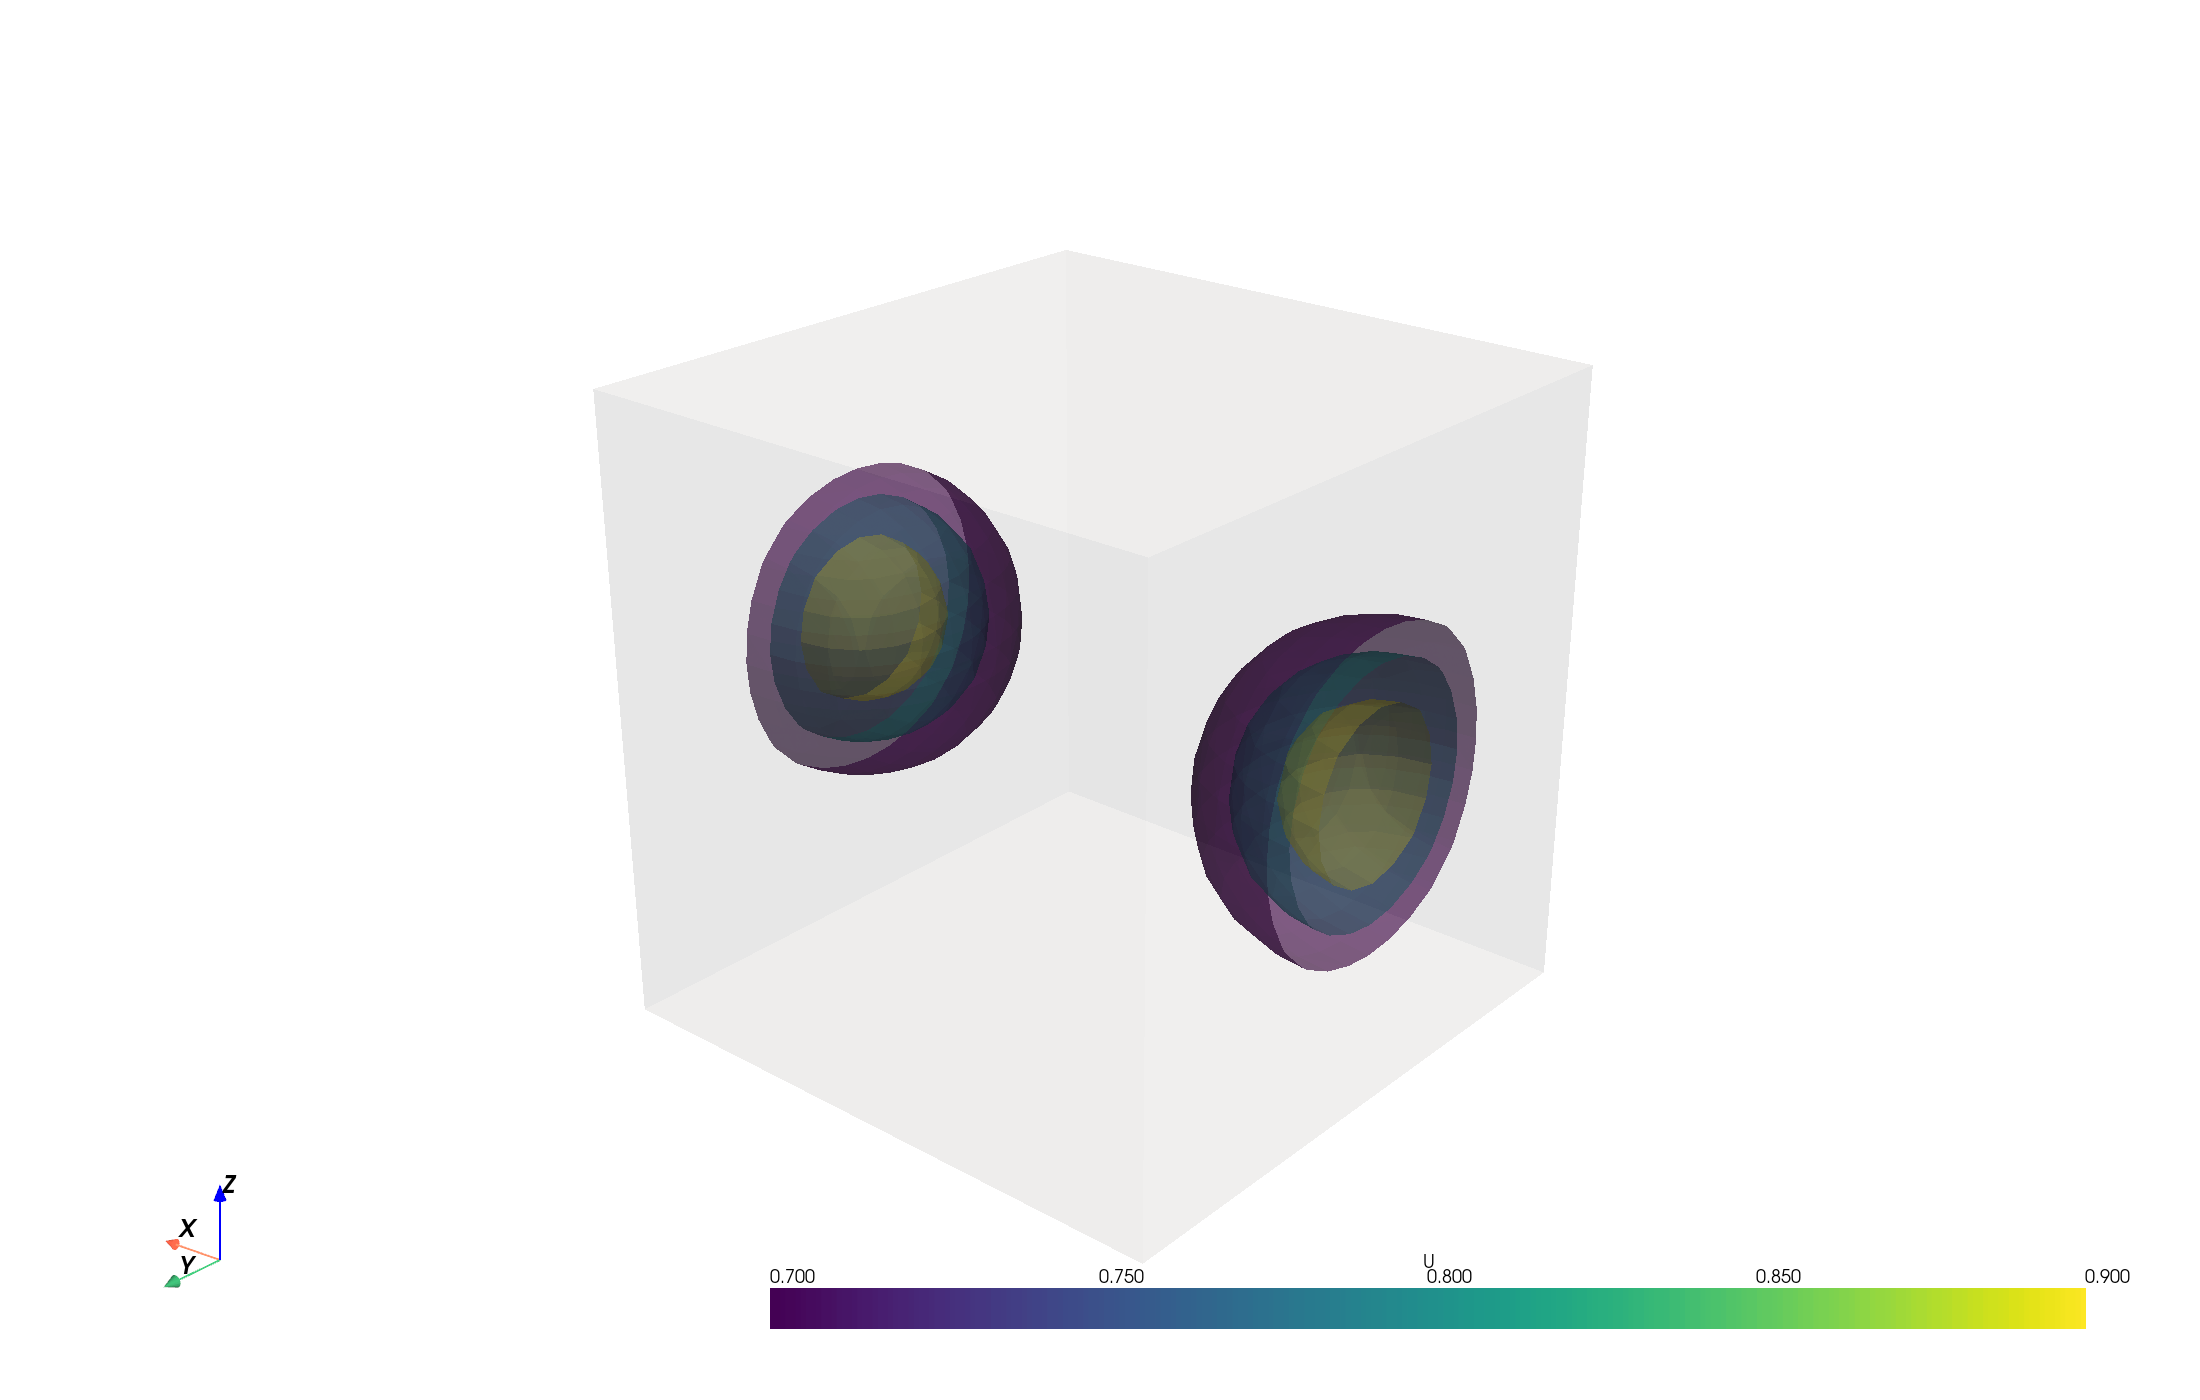

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


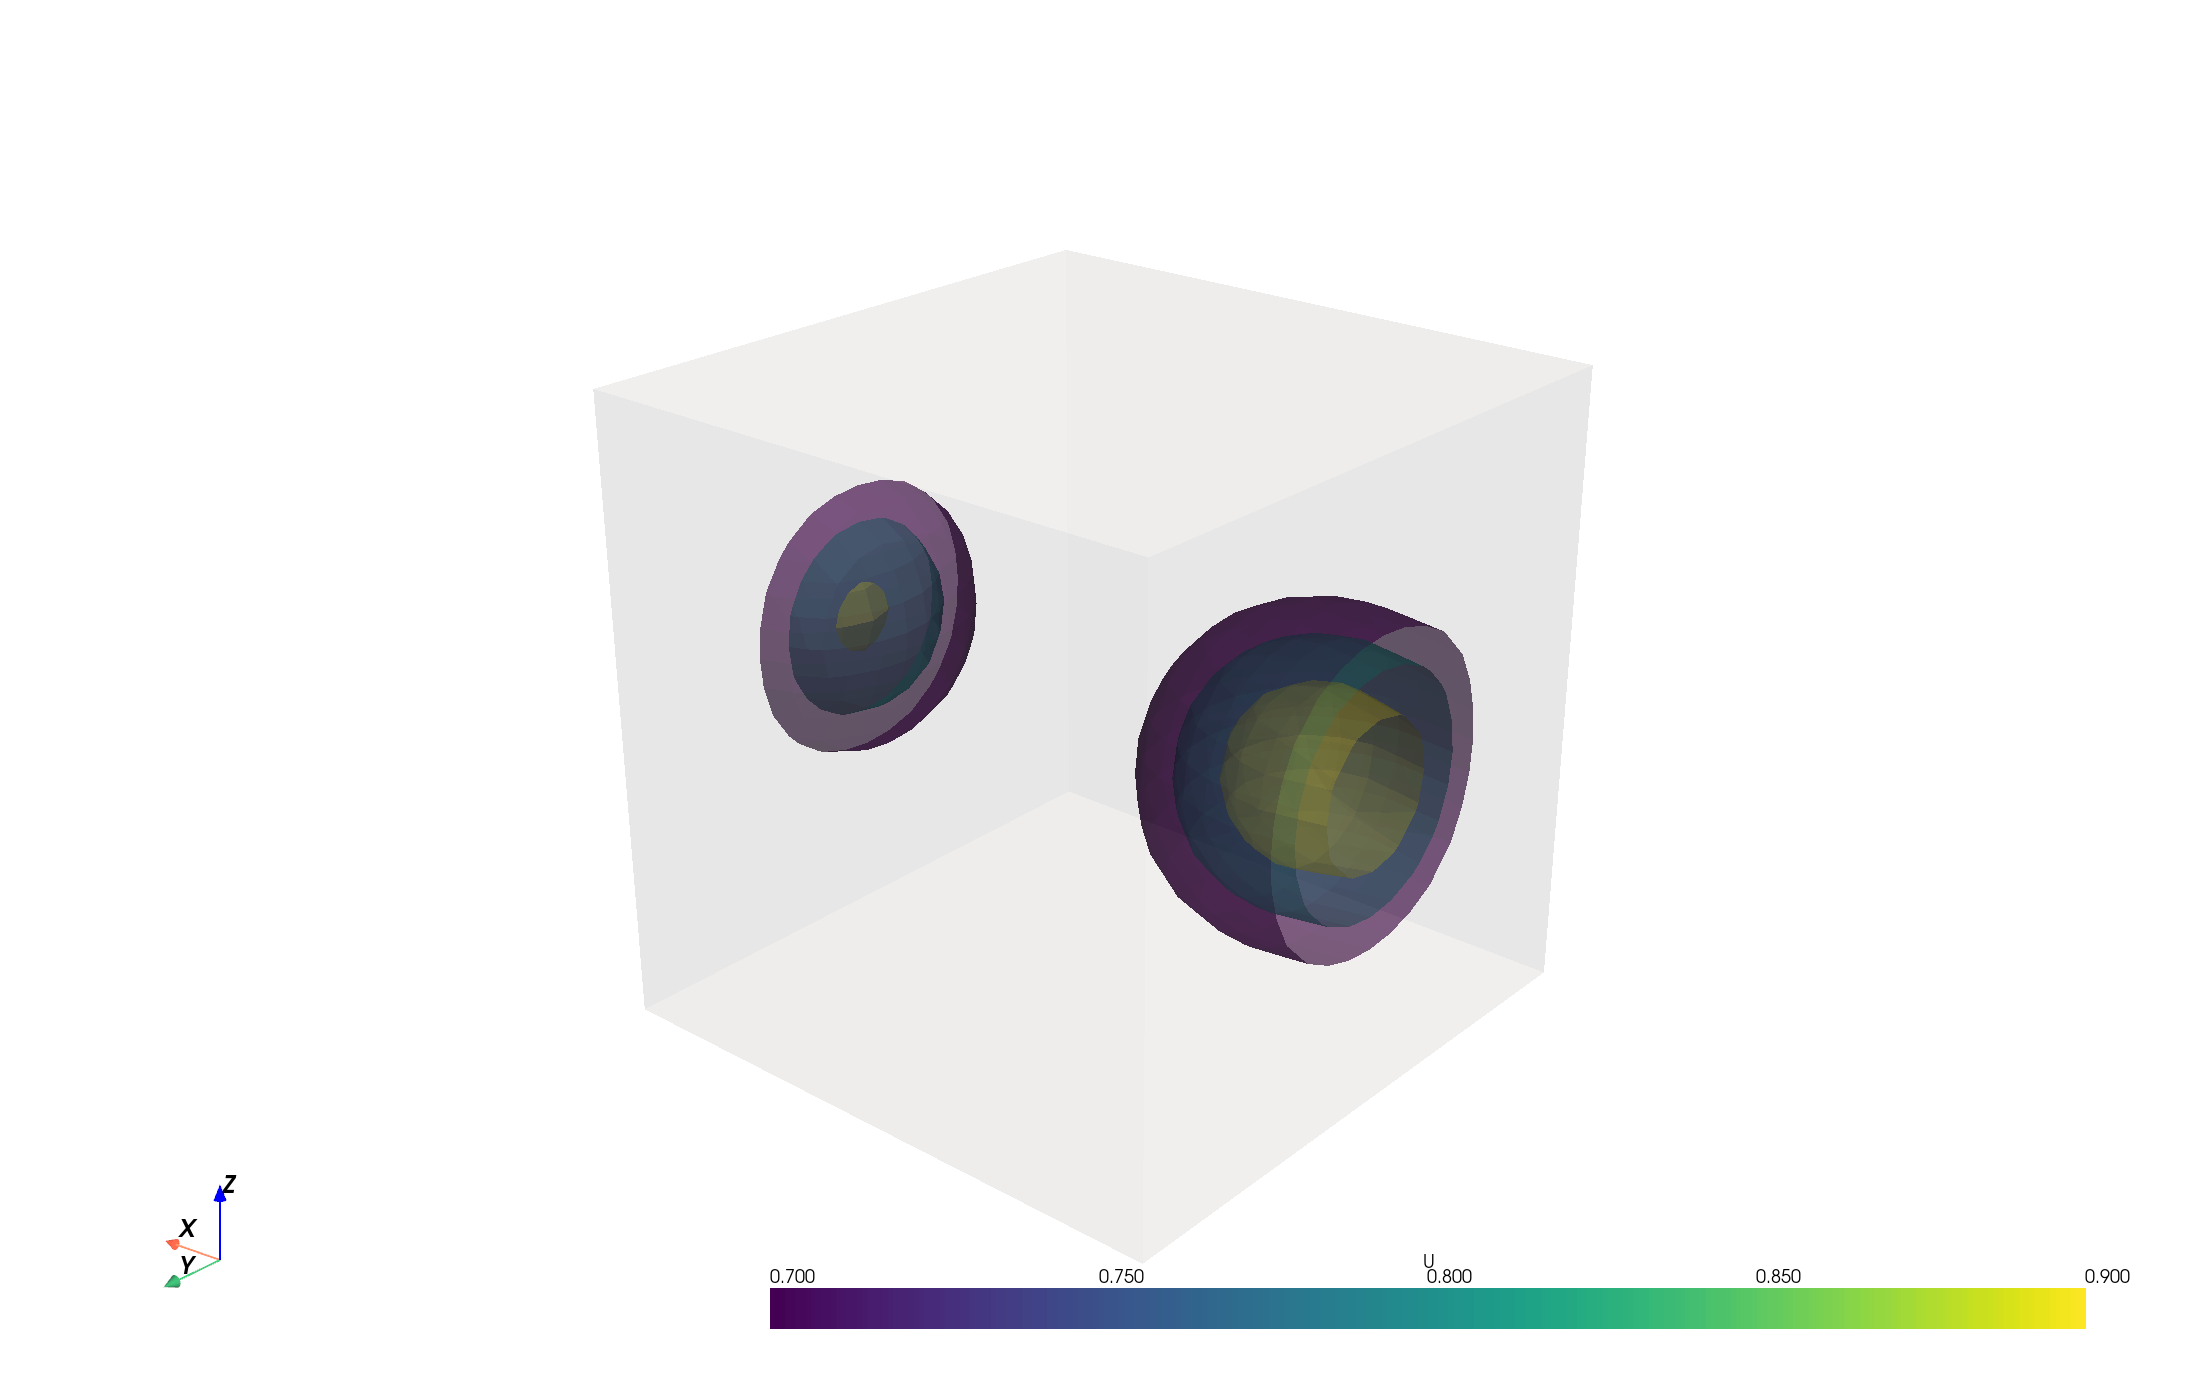

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


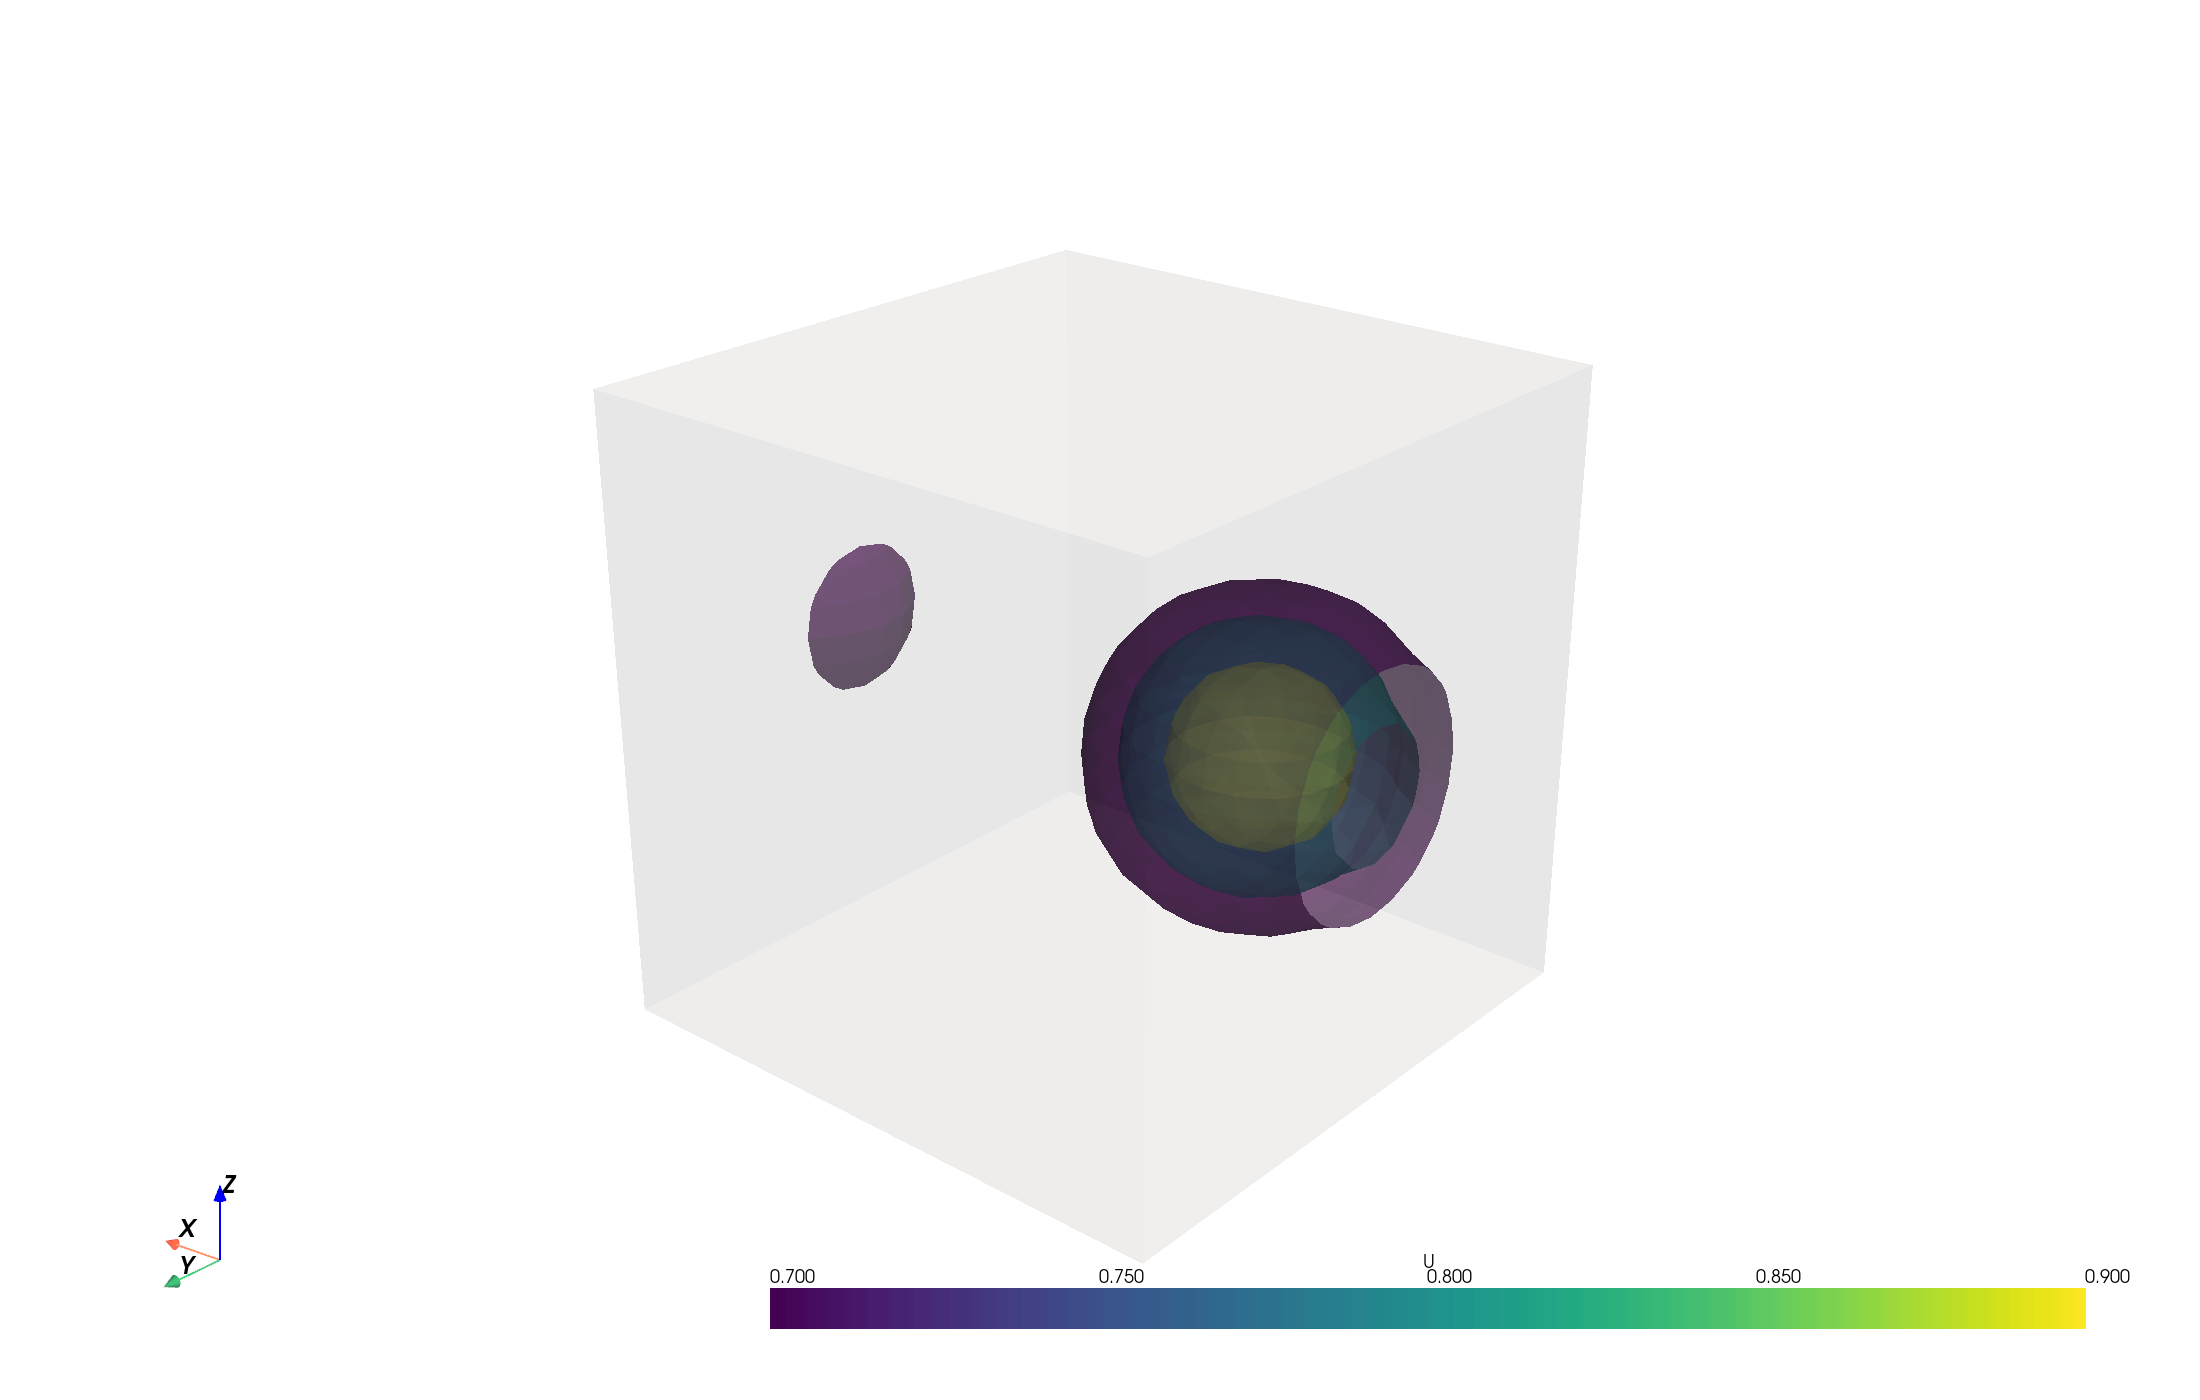

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


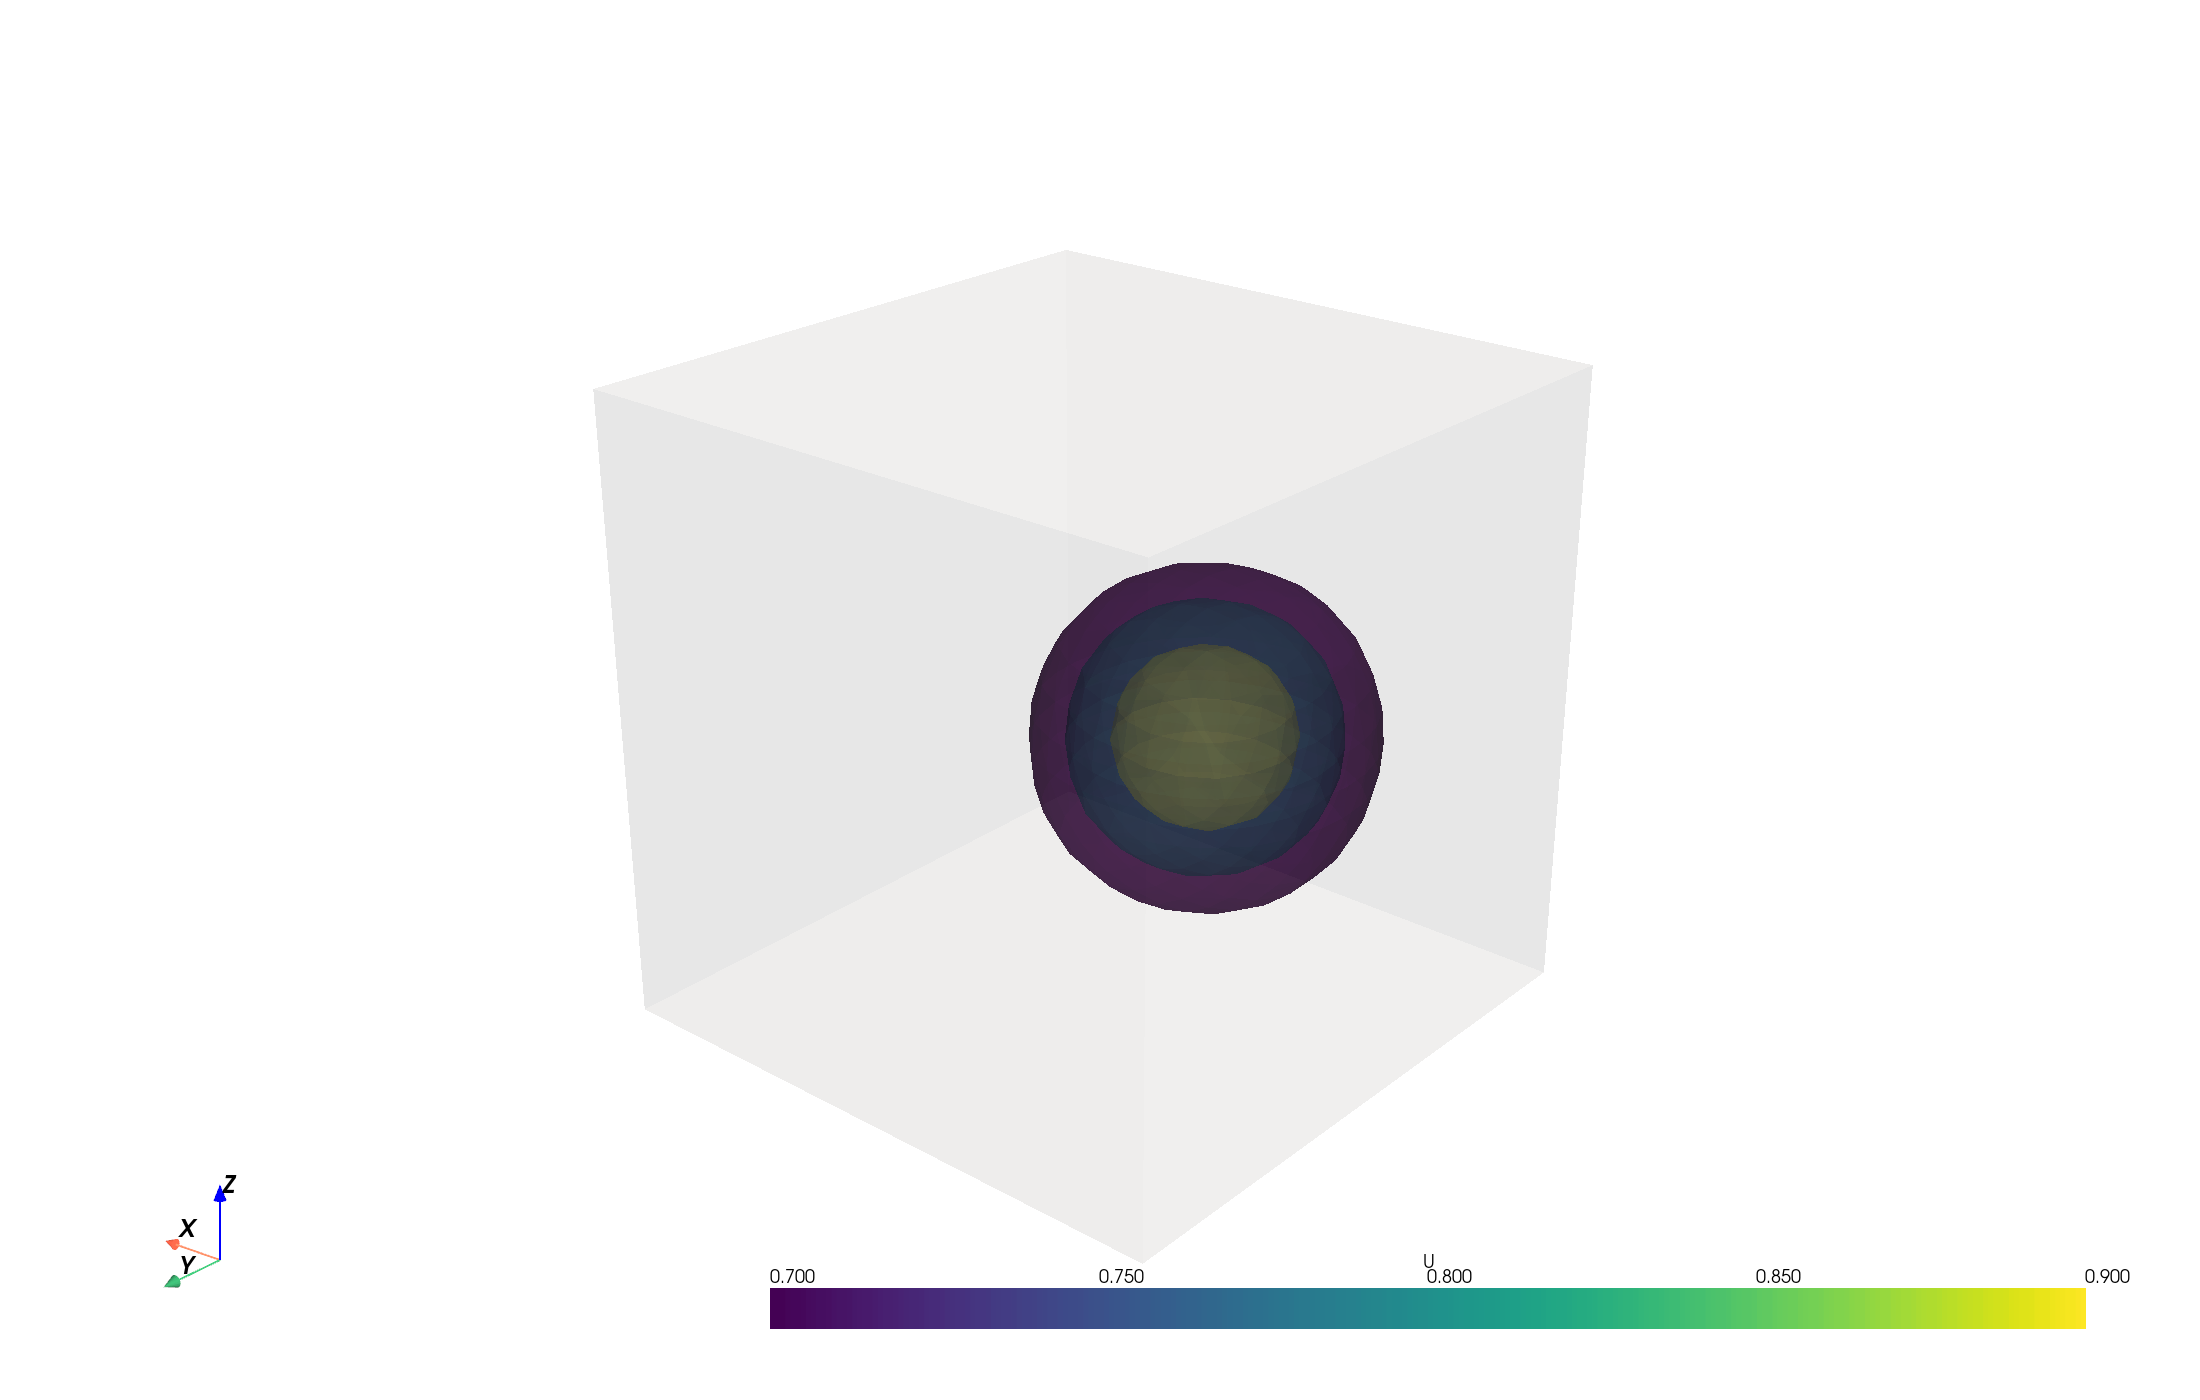

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


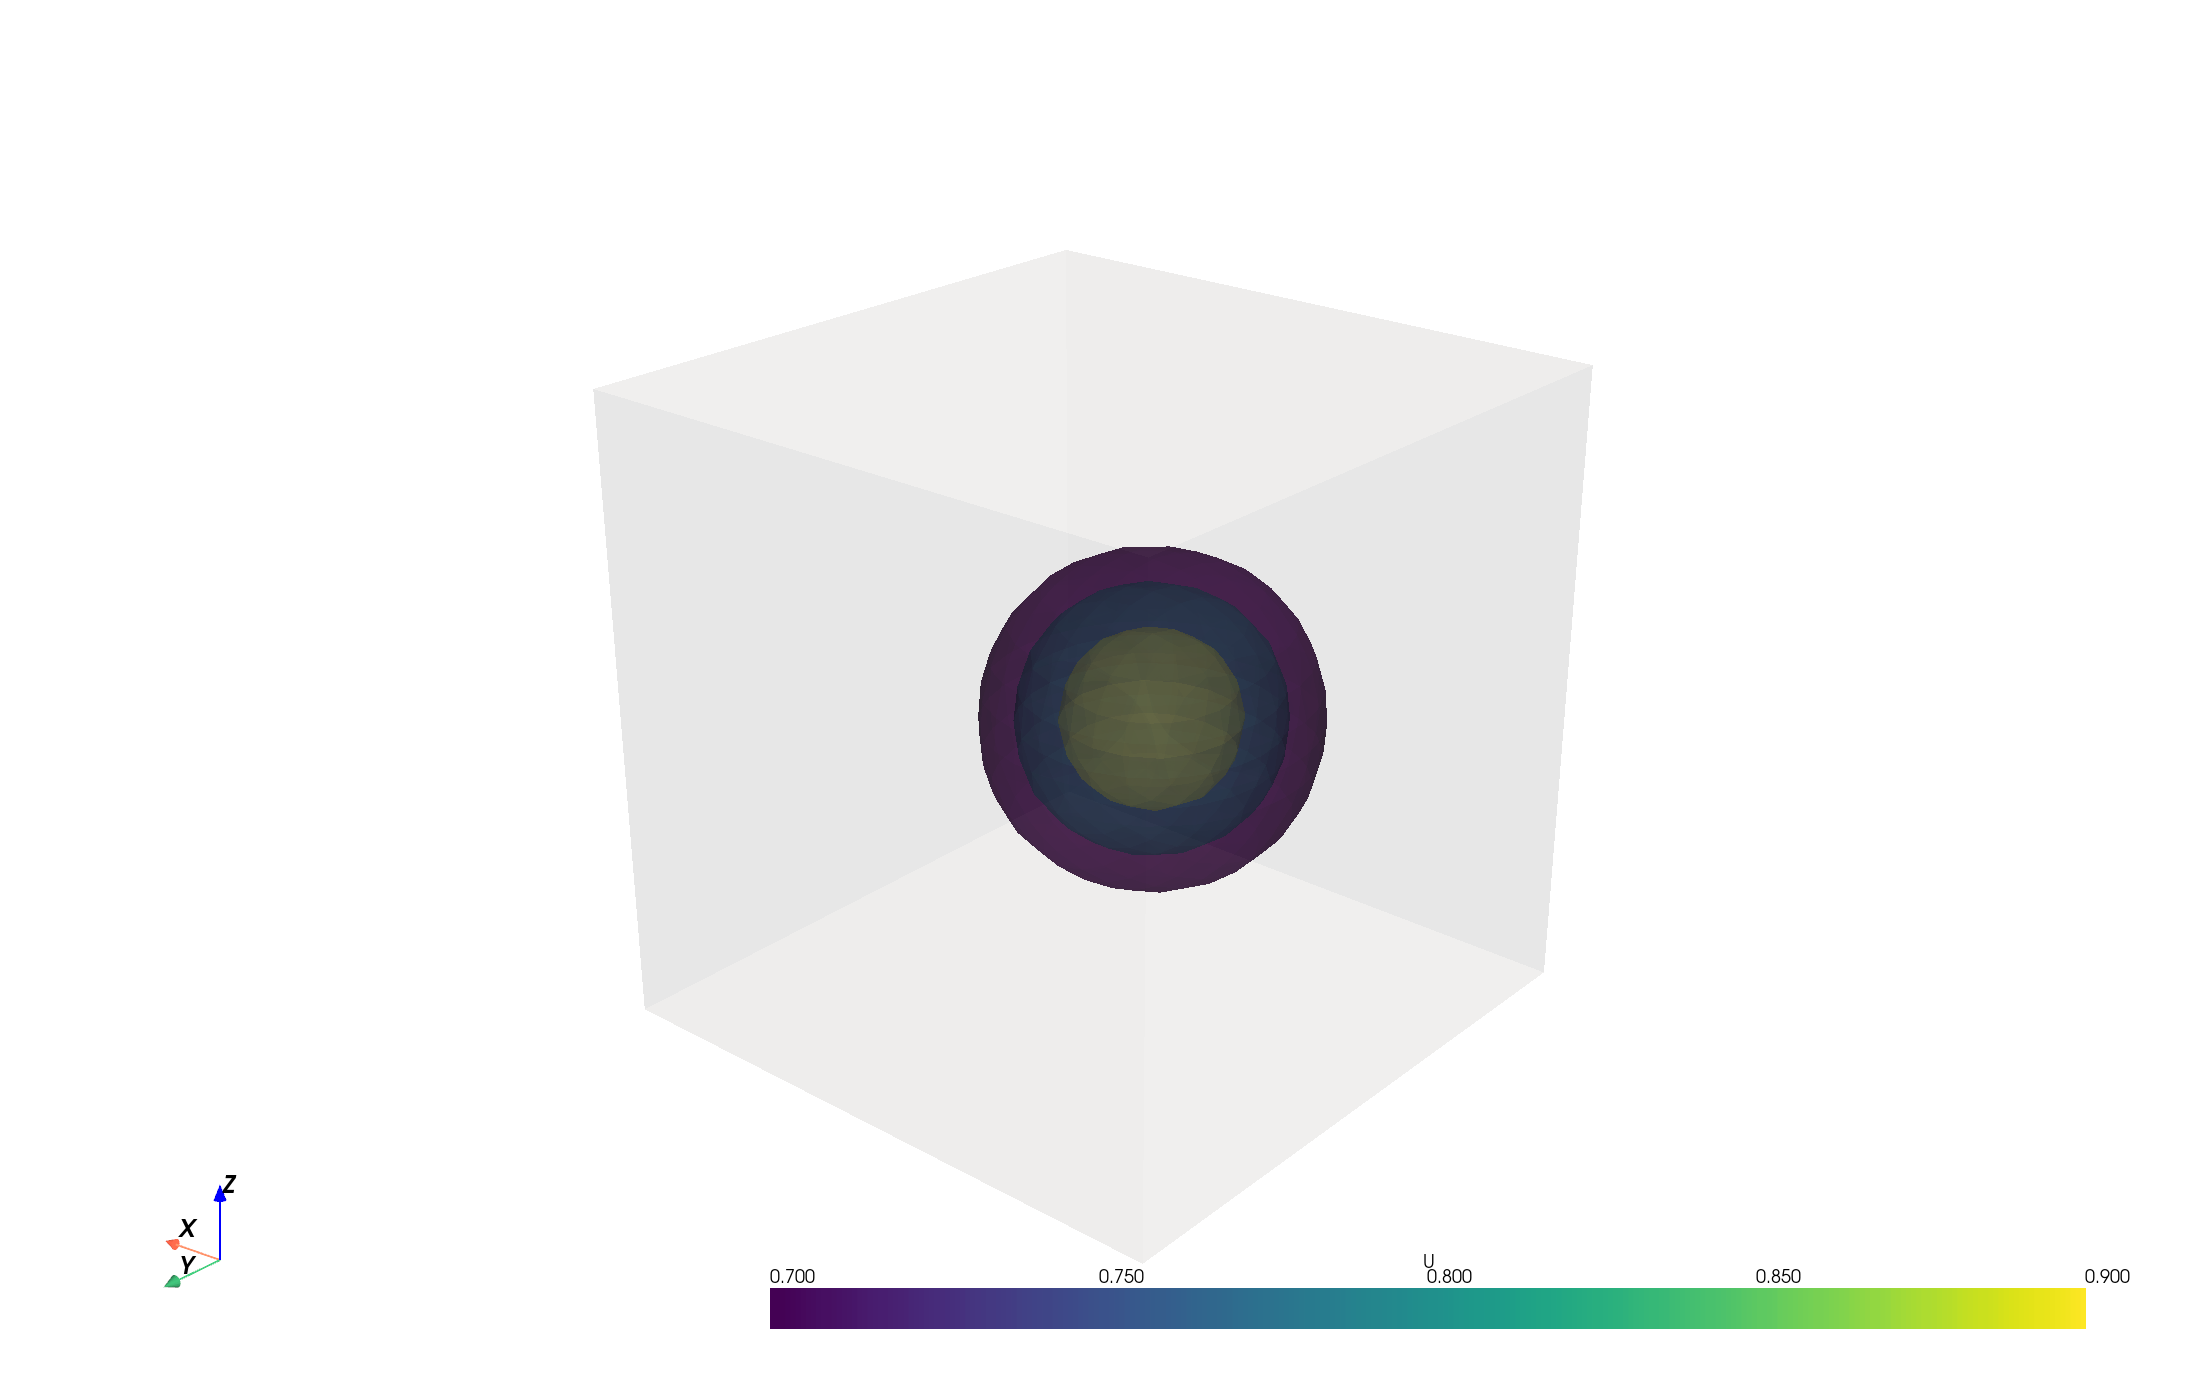

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


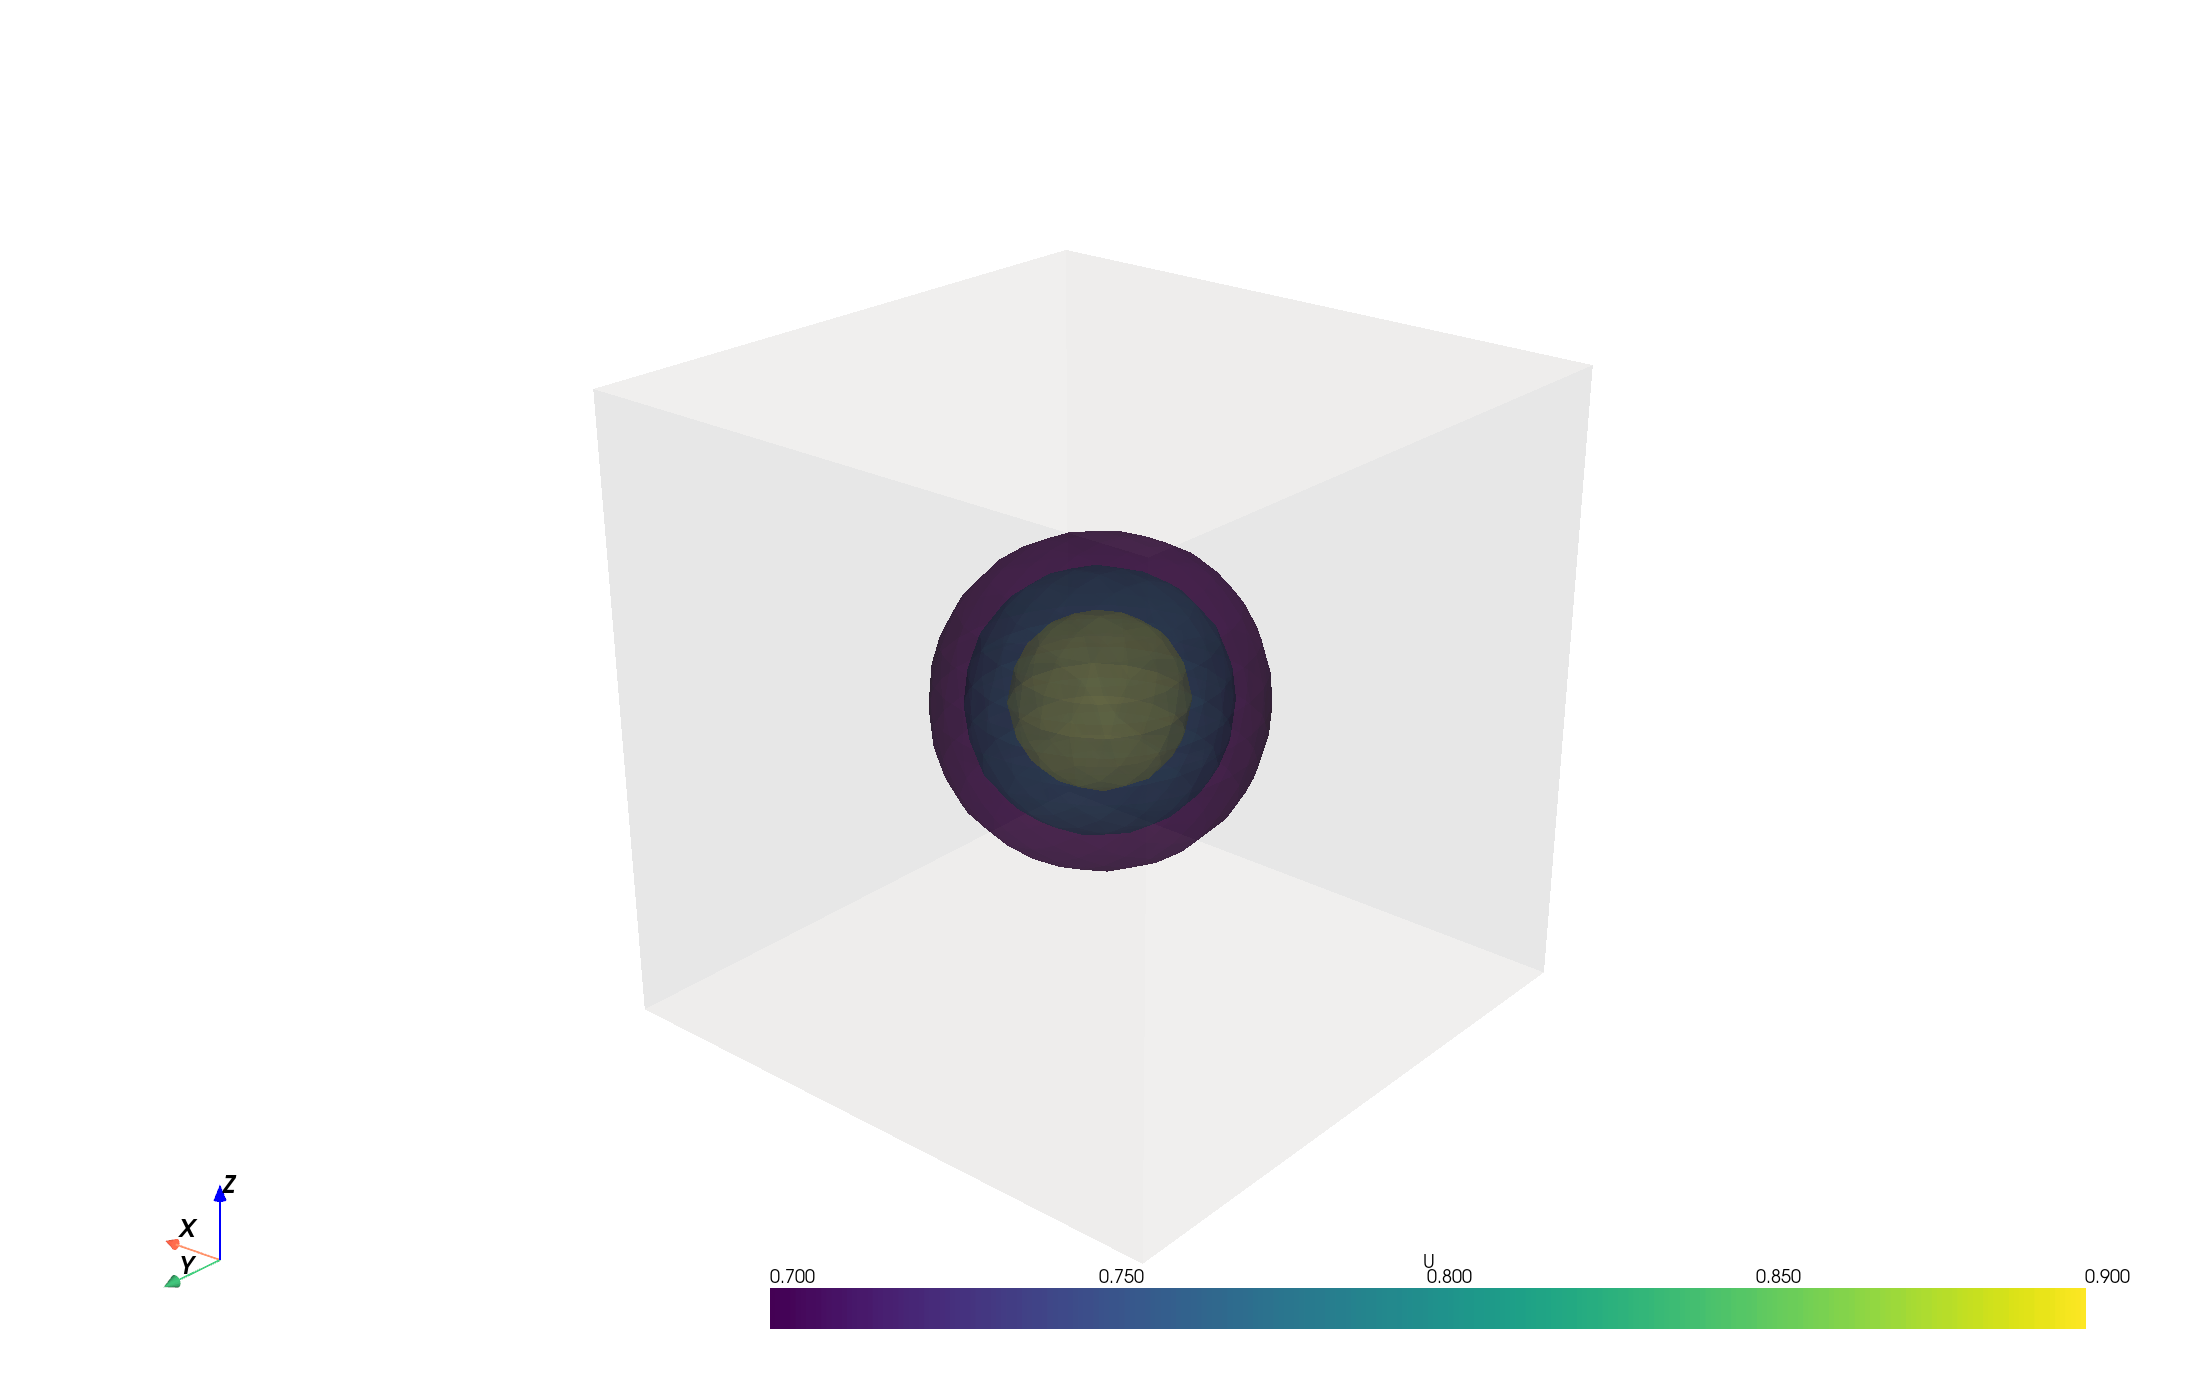

In [14]:
import warnings
warnings.filterwarnings("ignore", module="pyvista")
# Start the virtual framebuffer (Xvfb) to enable off-screen rendering
pv.start_xvfb()

# Find output files
vtk_files = glob(folder_out + "/*.vtk")

# Filter files that contain digits in their filenames
vtk_files_with_digits = [f for f in vtk_files if re.search(r'\d+', os.path.basename(f))]

# Sort the filtered files by the first sequence of digits found in the filenames
files = sorted(vtk_files_with_digits, key=lambda x: int(re.findall(r'\d+', os.path.basename(x))[0]))
lf=len(files)
print(files)

j=0
images = [] 
print("Printing figures in folder"+folder_out)

for fname in files:
    
    vtk_file=fname
    data = pv.read(vtk_file)
    grid = data.compute_cell_sizes().cell_data_to_point_data()
    plotter = pv.Plotter(off_screen=True,window_size=[2200, 1400])
   
    contour_values = [0.7,0.8,0.9] 
    contours = grid.contour(isosurfaces=contour_values, scalars="U") 
    if contours.n_points > 0:
        plotter.add_mesh(contours, cmap="viridis", scalars="U", opacity=0.7)

    plotter.camera_position = [
        (-1.8, 3.2, 2.1),  # Camera position (x, y, z)
        (0.5, 0.5, 0.5),  # Focal point (center of the object)
        (0, 0, 1),  # View up vector (defines the up direction)
    ]

    bounds = [0, 1, 0, 1, 0, 1]  
    box = pv.Box(bounds=bounds)
    plotter.add_mesh(box, color="white", line_width=1.0, opacity=0.1) 
    plotter.show_axes()
    
    image_path = fname+".png"
    plotter.show(screenshot=image_path)
    img = plotter.screenshot(return_img=True)
    images.append(img) 
    
    j=j+1
         
gif_path = os.path.join(folder_out, "animation.gif")
imageio.mimsave(gif_path, images, duration=12, loop=0)  # Adjust the duration as needed

And the resulting animation:

![Simulation GIF](../caseScalar/out/animation.gif)
